In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy.stats import normaltest
# pip install dataframe-image

import warnings
warnings.filterwarnings('ignore')


In [3]:
# pip install dataframe-image

# Background / Latar Belakang
Pada awal tahun 2019, Lembaga Kepolisian BOSTON meminta seorang ***data scientist*** untuk menganalisa data kejahatan historikal yang terjadi di Boston pada periode tahun 2015 sampai 2018. Dari data tersebut, diharapkan  ***data scientist*** tersebut dapat memberikan insight kepada Lembaga Kepolisian BOSTON menekan jumlah kriminilitas yang terjadi. 


# Problem Statement / Pernyataan Masalah
Data scientist expert harus dapat melakukan mapping lokasi tingkat kriminalitas yang terjadi di BOSTON pada periode 2015-2018. 

Setelah melakukan mapping area, data scientist expert selanjutnya akan menganalisa data kriminalitas pada setiap area, data yang dianalisa secara umum meliputi waktu / jam rawan terjadinya kriminalitas, severity / UCR_PART. 

Berdasarkan data yang telah dianalisis oleh data scientist expert selanjutnya akan dijadikan acuan dasar untuk rekomendasi Lembaga Kepolisian BOSTON dalam menentukan police station yang harus dibangun dan jumlah police officer yang harus disiagakan agar dapat menekan tingkat kriminalitas yang terjadi di Boston. Salah satu strategi yang akan diterapkan menentukan jumlah pos dan polisi yang harus disiagakan pada waktu dan area yang tepat berdasarkan data historikal yang telah diperoleh. 

Bagimana gambaran deskriptif tentang kriminilitas yang terjadi di BOSTON pada tahun 2015-2018

Berapa jumlah police officer yang harus disiagakan pada setiap area (District)?

Dimana police station harus dibangun pada setiap DISTRICT (STREET)?

## Load Dataset

### Membuka tabel yang berisi data utama dari Boston Crime

In [4]:
dfA = pd.read_csv('crime.csv',encoding='windows-1252',skipinitialspace = True)
# converters={
#     'INCIDENT_NUMBER': str.strip(),
#     'OFFENSE_CODE_GROUP' : str.strip(),
#     'OFFENSE_DESCRIPTION' : str.strip(),
#     'DISTRICT' : str.strip(),
#     'REPORTING_AREA' : str.strip(),
#     'SHOOTING' : str.strip(),
#     'OCCURRED_ON_DATE' : str.strip(),
#     'DAY_OF_WEEK' : str.strip(),
#     'UCR_PART' : str.strip(),
#     'STREET' : str.strip(),
#     'Location' : str.strip() } 
dfA.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"


In [5]:
# menghilangkan whitespaces
for i in dfA.columns : 
    if dfA.dtypes[i] == "O" :
        dfA[i] = dfA[i].str.strip()
dfA.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:
dfB = pd.read_csv('offense_codes.csv',encoding='windows-1252') 
dfB.head(3)

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES


### Membuka tabel yang berisi detail dari OFFENSE_CODE (untuk OFFENSE_CODE =  619) untuk memastikan data pada main table telah sesuai dengan list

### Opening main table OFFENSE_CODE (for OFFENSE_CODE = 619) to check the data on main table already matched

In [7]:
dfA[dfA['OFFENSE_CODE']==619].head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
45,I182070885,619,Larceny,LARCENY ALL OTHERS,B3,456.0,NaN,2018-09-03 17:17:00,2018,9,Monday,17,Part One,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)"
110,I182070816,619,Larceny,LARCENY ALL OTHERS,C6,185.0,NaN,2018-09-03 12:45:00,2018,9,Monday,12,Part One,MASSACHUSETTS AVE,42.321987,-71.062807,"(42.32198656, -71.06280666)"


In [8]:
dfB = pd.read_csv('offense_codes.csv',encoding='windows-1252') 
dfB[dfB['CODE']==619].head()

,CODE,NAME
161,619,LARCENY ALL OTHERS
312,619,LARCENY OTHER $200 & OVER


***Because the data from 'offense_codes.csv' is already input in 'crime.csv'. Therefore the data 'offense_codes.csv' is not needed to be join / merge. And the data from 'offense_codes.csv' will only be used if needed***

***Dikarenakan data dari 'offense_codes.csv' sudah diinput ke dalam 'crime.csv'. Maka data 'offense_codes.csv' tidak perlu dilakukan join / merge. Dan data  'offense_codes.csv' hanya akan digunakan bila diperlukan***

### Showing info and data type on dataframe (Total 18 columns)
### Menampilkan info dan type data pada dataframe (Total 18 columns)
INCIDENT_NUMBER     = Police's report file number (similar to primary key) / No laporan berkas polisi

OFFENSE_CODE        = Code for type of committed crime/ Kode untuk detail tipe kejahatan yang dilakukan

OFFENSE_CODE_GROUP  = Committed crime category / Kategori kejahatan yang dilakukan

OFFENSE_DESCRIPTION = Detail definition for committed crime / Definisi untuk kejahatan yang dilakukan

DISTRICT            = Area of committed crime / Wilayah tempat kejahatan terjadi

REPORTING_AREA      = Code for crime spot / Kode untuk tempat perkara kejadian

SHOOTING            = Whether the crime involves shooting or not / Apakah terjadi penembakan

OCCURRED_ON_DATE    = Date of crime occured / Tanggal terjadinya kejahatan

Year                = Extract year from columns 'OCCURRED_ON_DATE' / ekstraksi tahun dari kolom 'OCCURRED_ON_DATE'

Month               = Extract Month from columns 'OCCURRED_ON_DATE' / ekstraksi bulan dari kolom 'OCCURRED_ON_DATE'

DAY_OF_WEEK         = Days of occured crime / Hari terjadinya kejahatan

HOUR                = Extract hour from columns 'OCCURRED_ON_DATE' / ekstraksi jam dari kolom 'OCCURRED_ON_DATE'

UCR_PART            = Uniform Crime Reporting (severity level of a crime) / tingkat keparahan kejahatan yang terjadi

STREET              = Street name where crime committed / Nama jalan tempat kejahatan terjadi

Lat                 = Latittude

Long                = Longitude

Location            = combination between Lattitude and Longitude (geographical location). If NaN Lat & Long is NaN then will be filled with (0.00000000, 0.00000000) / kombinasi antara Lattitude dan Longitude. Bila NaN maka akan diisi dengan (0.00000000, 0.00000000).

## INSIGHT UCR (UNIFORM CRIME REPORTS)

Secara singkat, UCR merupakan laporan kepolisian resmi yang dikeluarkan oleh pihak kepolisian. Laporan ini kemudian akan dikelompokkan menjadi beberapa bagian ('part') sesuai dengan tingkat kriminilitas yang terjadi. 

Dimana tingkat kriminalitas yang tinggi akan dilabeli sebagai tingkat 1 (dalam kasus ini 'Part One') seperti kriminilitas yang berkaitan kekerasan dan kejahatan properti seperti serangan berat, pemerkosaan paksa, pembunuhan, dan perampokan diklasifikasikan sebagai kekerasan sementara pembakaran, perampokan, pencurian, dan pencurian kendaraan bermotor diklasifikasikan sebagai kejahatan properti. 

Sedangkan tingkat kriminalitas rendah akan dilabeli sebagai tingkat 2 (dalam kasus ini 'Part Two') seperti penyerangan, pelanggaran jam malam dan berkeliaran, penggelapan, pemalsuan , perilaku tidak tertib, mengemudi di bawah pengaruh, pelanggaran narkoba, penipuan, perjudian, pelanggaran minuman keras, pelanggaran terhadap keluarga, prostitusi, mabuk di depan umum, pelarian, pelanggaran seks, barang curian, vandalisme, gelandangan, dan pelanggaran senjata.

**notes : dalam kasus ini, terdapat 4 tingkatan UCR yang terjadi yaitu 'Part One','Part Two','Part Three' dan 'Other'. Dikarenakan referensi pada internet hanya terdapat 2 bagian UCR (part 1 dan part 2)**  `maka pada kasus ini akan diasumsikan tingkatan UCR_Partnya adalah sebagai berikut Part One > Part Two > Part Three > Other`

---

"The Uniform Crime Reporting (UCR) program compiles official data on crime in the United States, published by the Federal Bureau of Investigation (FBI). UCR is "a nationwide, cooperative statistical effort of nearly 18,000 city, university and college, county, state, tribal, and federal law enforcement agencies voluntarily reporting data on crimes brought to their attention".

For reporting purposes, criminal offenses are divided into two major groups: Part I offenses and Part II offenses.

In Part I, the UCR indexes reported incidents of index crimes which are broken into two categories: violent and property crimes. Aggravated assault, forcible rape, murder, and robbery are classified as violent while arson, burglary, larceny-theft, and motor vehicle theft are classified as property crimes. These are reported via the document named Return A – Monthly Return of Offenses Known to the Police. Part 1 crimes are collectively known as Index crimes, this name is used because the crimes are considered quite serious, tend to be reported more reliably than others, and the reports are taken directly by the police and not a separate agency which aggregates the data and does not necessarily contribute to the UCR.

In Part II, the following categories are tracked: simple assault, curfew offenses and loitering, embezzlement, forgery and counterfeiting, disorderly conduct, driving under the influence, drug offenses, fraud, gambling, liquor offenses, offenses against the family, prostitution, public drunkenness, runaways, sex offenses, stolen property, vandalism, vagrancy, and weapons offenses."


![](https://upload.wikimedia.org/wikipedia/commons/7/7a/UCR_versus_NCVS.PNG)


source from 
'https://en.wikipedia.org/wiki/Uniform_Crime_Reports'

In [9]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       298823 non-null  float64
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [10]:
dfA.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA          20250
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [11]:
# mengatur tampilan jumlah display yang dapat ditampilkan oleh python
def lihat(aa=None):
    return pd.set_option('display.max_colwidth', aa), pd.set_option('display.max_rows', aa)
lihat()
# data unique di tiap kolom
def show_uniuqe(dataframe) : 
    listItem = []
    for col in dataframe.columns :
        listItem.append( [col, dataframe[col].nunique(),dataframe[col].dtypes, dataframe[col].unique()])

    UniqueVal = pd.DataFrame(columns=['ColumnName', 'NumberofUnique', 'Dtypes','UniqueValue'],
                        data=listItem)
    UniqueVal

In [12]:
lihat(20)
cek = dfA[dfA['INCIDENT_NUMBER'].duplicated()].sample(5)['INCIDENT_NUMBER']
cek

318738    I152037663-00
43583        I182024233
125114       I172044930
209454       I162060911
272956       I152100209
Name: INCIDENT_NUMBER, dtype: object

In [13]:
dfA[dfA['INCIDENT_NUMBER'].isin(cek)].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
43582,I182024233,2007,Restraining Orde...,VIOL. OF RESTRAI...,A1,67.0,NaN,2018-04-01 15:00:00,2018,4,Sunday,15,Part Two,PINCKNEY ST,42.358839,-71.066086,"(42.35883898, -7..."
43583,I182024233,2629,Harassment,HARASSMENT,A1,67.0,NaN,2018-04-01 15:00:00,2018,4,Sunday,15,Part Two,PINCKNEY ST,42.358839,-71.066086,"(42.35883898, -7..."
43584,I182024233,3115,Investigate Person,INVESTIGATE PERSON,A1,67.0,NaN,2018-04-01 15:00:00,2018,4,Sunday,15,Part Three,PINCKNEY ST,42.358839,-71.066086,"(42.35883898, -7..."
125113,I172044930,1001,Counterfeiting,FORGERY / COUNTE...,B3,437.0,NaN,2017-05-06 10:30:00,2017,5,Saturday,10,Part Two,TALBOT AVE,42.290415,-71.072695,"(42.29041538, -7..."
125114,I172044930,3125,Warrant Arrests,WARRANT ARREST,B3,437.0,NaN,2017-05-06 10:30:00,2017,5,Saturday,10,Part Three,TALBOT AVE,42.290415,-71.072695,"(42.29041538, -7..."


In [14]:
dfA[(dfA['Location']=='(0.00000000, 0.00000000)')|(dfA['Location']=='(-1.00000000, -1.00000000)')].sample(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
40012,I182028019,3803,Motor Vehicle Ac...,M/V ACCIDENT - P...,A1,NaN,NaN,2018-04-14 19:55:00,2018,4,Saturday,19,Part Three,BATTERY ST,NaN,NaN,"(0.00000000, 0.0..."
207976,I162062519,1844,Drug Violation,DRUGS - POSS CLA...,B3,427.0,NaN,2016-08-04 15:00:00,2016,8,Thursday,15,Part Two,NaN,NaN,NaN,"(0.00000000, 0.0..."
158502,I172009240,3125,Warrant Arrests,WARRANT ARREST,NaN,NaN,NaN,2017-02-03 11:32:00,2017,2,Friday,11,Part Three,TREMONT,-1.0,-1.0,"(-1.00000000, -1..."
137309,I172031848,3801,Motor Vehicle Ac...,M/V ACCIDENT - O...,D4,NaN,NaN,2017-04-24 10:58:00,2017,4,Monday,10,Part Three,COMMONWEALTH AVE,NaN,NaN,"(0.00000000, 0.0..."
109705,I172061394,3207,Property Found,PROPERTY - FOUND,D4,NaN,NaN,2017-07-28 12:00:00,2017,7,Friday,12,Part Three,MASSACHUSETTS AVE,NaN,NaN,"(0.00000000, 0.0..."


In [15]:
dfA.pivot_table(
    'INCIDENT_NUMBER',
    ['DISTRICT','STREET','REPORTING_AREA','Location'],
    aggfunc='count'
).head(100)

INCIDENT_NUMBER
DISTRICT STREET       REPORTING_AREA Location                             
A1       5 BEACON ST  102.0          (0.00000000, 0.00...                3
         ACORN ST     70.0           (42.35761285, -71...                2
         ADAMS ST     364.0          (42.29443670, -71...                2
         ALBANY ST    124.0          (42.34722650, -71...                1
                                     (42.34823884, -71...                1
...                                                                    ...
         ATLANTIC AVE 114.0          (42.35265900, -71...               10
                                     (42.35321626, -71...               24
                                     (42.35366271, -71...               20
                                     (42.35383485, -71...                8
                                     (42.35438252, -71...              100

[100 rows x 1 columns]

## Insight EDA
Secara umum, berdasarkan eksplorasi data diatas dapat disimpulkan bahwa :

- data `Crime in Boston memiliki total data 319073` (mengacu dari kolom 'INCIDENT_NUMBER') `dengan jumlah unique value pada kolom 'INCIDENT_NUMBER' sebanyak 282517`, hal ini menandakan terdapat beberapa data duplicate pada kolom 'INCIDENT_NUMBER'

- Dapat disimpulkan data bahwa kolom `'INCIDENT_NUMBER' yang memiliki duplicate menandakan bahwa pada waktu dan tempat yang sama, terjadi beberapa tindakan kriminilitas yang berbeda` ('OFFENSE_CODE_GROUP' dan 'OFFENSE_DESCRIPTION'). `** Untuk pengolahan data selanjutnya setiap data dengan duplicated 'INCIDENT_NUMBER' akan dianggap sebagai data yang unique dalam pengolahan data. Contoh : 'INCIDENT_NUMBER' I182050434 akan diasumsikan memiliki 2 kejadian kejahatan yang berbeda sehingga data dengan INCIDENT_NUMBER yang sama tidak akan didrop**` 

- beberapa kolom, yaitu, `DISTRICT`, `REPORTING_AREA`, `SHOOTING`, `UCR_PART`, `STREET`, `Lat` dan `Long` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.Sedangkan pada kolom `Location` nilai (0.00000000, 0.00000000) menandakan nilai NaN dari kolom  `Lat` dan `Long`

- kolom `INCIDENT_NUMBER` berisikan id unique laporan kepada pihak kepolisian, kolom ini akan dihiraukan karena banyak nilai unique dan tidak akan digunakan pada analisa

- kolom `SHOOTING` memiliki 2 value antara NaN dan 'Y'. Kolom NaN nantinya akan diisi dengan value 'N'

- Dataset memiliki 3 kategori utama yang akan dipertimbangkan dalam proses analisa data, yaitu :
    
    a. `Kategori tingkat kriminalitas` > analisa akan di `titik beratkan pada  kolom 'UCR_PART'`**(kolom ini harus dibersihkan hingga tidak terdapat Missing Values)** yang dielaborasi lebih lanjut melalui kolom `'OFFENSE_DESCRIPTION', 'OFFENSE_CODE_GROUP', 'SHOOTING'` 
    
    b. `Kategori area / lokasi`  > analisa akan di `titik beratkan pada  kolom 'DISTRICT' dan 'STREET'` yang dielaborasi lebih lanjut melalui kolom `'REPORTING_AREA'`. ** Karena fokus kategori data lokasi akan dititik beratkan pada kolom **'DSITRICT' dan 'STREET' (kolom ini harus dibersihkan hingga tidak terdapat Missing Values)** maka kolom `'Lat', 'Long' dan 'Location' akan didrop / tidak digunakan dengan pertimbangan bahwa  kolom 'DISTRICT','STREET' dan 'REPORTING_AREA' sudah dapat mewakili kolom yang dihapus`**
    
    **Berdasarkan eksplorasi data maka dapat disimpulkan bahwa klasifikasi kolom area 'DISTRICT' > 'STREET' > 'REPORTING_AREA' > 'Location'**
    
    c. `Kategori waktu` > analisa akan di `'YEAR', 'MONTH', 'DAYOFWEEK', 'HOUR', 'DATE'(nenbuat kolom baru)` yang dielaborasi lebih lanjut melalui kolom `'OCCURRED_ON_DATE'` 

**UCR_PART merupakan data bertipe categorical ordinal, dimana part one merupakan tingkat kriminal berat dan part three merupakan tingkat kriminal ringan**

### Filling NaN on 'SHOOTING' column / Mengisi data NaN pada kolom 'SHOOTING'

In [16]:
dfA['SHOOTING']=dfA['SHOOTING'].fillna('N')
dfA.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -7..."
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -7..."
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -7..."


In [17]:
# mengecek kolom dengan nilai data yang NaN
dfA.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
REPORTING_AREA         20250
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10871
Lat                    19999
Long                   19999
Location                   0
dtype: int64

***Make new table for UCR_PART based on recoreded data*** / ***Membuat table list untuk UCR_PART berdasarkan data yang sudah ada***

In [18]:
dfUP = dfA.pivot_table(
    'INCIDENT_NUMBER',
    'OFFENSE_DESCRIPTION',
    'UCR_PART',
    aggfunc='count'
).dropna(how='all')
dfUP.head()

UCR_PART,Other,Part One,Part Three,Part Two
OFFENSE_DESCRIPTION,,,,
"A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",NaN,1.0,NaN,NaN
A&B ON POLICE OFFICER,NaN,NaN,NaN,3.0
ABDUCTION - INTICING,NaN,NaN,NaN,12.0
AFFRAY,NaN,NaN,NaN,249.0
AIRCRAFT INCIDENTS,NaN,NaN,36.0,NaN


In [19]:
dfUP.isna().sum()[0] + dfUP.isna().sum()[1] + dfUP.isna().sum()[2] + dfUP.isna().sum()[3] == len(dfUP)*3

True

Membuat kategori UCR_PART dari OFFENSE_DESCRIPTION dengan menggunakan data yang ada

In [20]:
dfUP['UCR_PART'] = np.select(
    [(dfUP['Other']> 0),(dfUP['Part One']> 0),(dfUP['Part Three']> 0),(dfUP['Part Two']> 0)],
    ['Other','Part One','Part Three','Part Two']
)
dfUP.head()

UCR_PART,Other,Part One,Part Three,Part Two,UCR_PART
OFFENSE_DESCRIPTION,,,,,
"A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",NaN,1.0,NaN,NaN,Part One
A&B ON POLICE OFFICER,NaN,NaN,NaN,3.0,Part Two
ABDUCTION - INTICING,NaN,NaN,NaN,12.0,Part Two
AFFRAY,NaN,NaN,NaN,249.0,Part Two
AIRCRAFT INCIDENTS,NaN,NaN,36.0,NaN,Part Three


In [21]:
dfUP = dfUP.reset_index().drop(columns=['Other','Part One','Part Three','Part Two'])

In [22]:
dfUP.columns.names=[None]
dfUP.head()

,OFFENSE_DESCRIPTION,UCR_PART
0,"A&B HANDS, FEET,...",Part One
1,A&B ON POLICE OF...,Part Two
2,ABDUCTION - INTI...,Part Two
3,AFFRAY,Part Two
4,AIRCRAFT INCIDENTS,Part Three


### Combine table UCR_PART to fill the missing UCR_Part based on current data on main table. After filling still have missing 86 data from 90 data 

In [23]:
new_dfA = dfA.merge(dfUP,how='left',left_on='OFFENSE_DESCRIPTION',right_on='OFFENSE_DESCRIPTION').drop(columns='UCR_PART_x').rename(columns={'UCR_PART_y':'UCR_PART'})
new_dfA.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,N,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -7...",Part One
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,N,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300,"(42.30682138, -7...",Part Two
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,N,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -7...",Part Three
3,I182070940,3114,Investigate Prop...,INVESTIGATE PROP...,D4,272.0,N,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -7...",Part Three
4,I182070938,3114,Investigate Prop...,INVESTIGATE PROP...,B3,421.0,N,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -7...",Part Three


### Checking UCR_PART data that have NaN value based on OFFENSE_DESCRIPTION

In [24]:
new_dfA['OFFENSE_DESCRIPTION'][new_dfA['UCR_PART'].isna()].unique()

array(['HOME INVASION', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
       'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'], dtype=object)

Checking data with UCR_PART that is non-NaN

In [25]:
dfUPN = new_dfA['OFFENSE_DESCRIPTION'][new_dfA['UCR_PART'].isna()==False]
dfUPN.head(3)

0     LARCENY ALL OTHERS
1              VANDALISM
2    TOWED MOTOR VEHICLE
Name: OFFENSE_DESCRIPTION, dtype: object

HOME INVASION

In [26]:
dfUPN[dfUPN.str.contains('INVASION')].head(3)

2412     ROBBERY - HOME I...
9212     ROBBERY - HOME I...
16819    ROBBERY - HOME I...
Name: OFFENSE_DESCRIPTION, dtype: object

In [27]:
hinv = dfUPN[dfUPN.str.contains('INVASION',case=False)].index
hinv

Index([  2412,   9212,  16819,  16991,  19152,  19428,  22648,  32550,  39744,
        41072,
       ...
       300292, 300935, 307457, 307747, 307869, 308104, 309503, 310393, 312539,
       315758],
      dtype='int64', length=104)

In [28]:
new_dfA.loc[hinv]['UCR_PART'].unique()

array(['Part One'], dtype=object)

### Since the data between 'HOME INVASION' and 'ROBBERY - HOME INVASION' is similar. Therefore, we will assume that the data is similar and 'HOME INVASION' UCR_PART column will be filled with 'Part One'.

In [29]:
new_dfA.loc[hinv]['UCR_PART'] = 'Part One'

In [30]:
new_dfA.loc[hinv].head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
2412,I182068263,371,Robbery,ROBBERY - HOME I...,E5,561.0,N,2018-08-25 21:33:00,2018,8,Saturday,21,PALFREY ST,42.284967,-71.120094,"(42.28496725, -7...",Part One
9212,I182060810,371,Robbery,ROBBERY - HOME I...,E18,493.0,N,2018-08-01 14:52:00,2018,8,Wednesday,14,REDDY AVE,42.262855,-71.111811,"(42.26285498, -7...",Part One
16819,I182052653,371,Robbery,ROBBERY - HOME I...,A7,12.0,N,2018-07-05 02:42:00,2018,7,Thursday,2,BRANDYWYNE DR,42.387836,-71.012038,"(42.38783615, -7...",Part One


In [31]:
dfUPN[dfUPN.str.contains('involun',case=False)].unique()

array([], dtype=object)

HUMAN TRAFFICKING - COMMERCIAL SEX ACTS

In [32]:
dfUPN[dfUPN.str.contains('traf',case=False)].unique()

array(['DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS',
       'DRUGS - CLASS A TRAFFICKING OVER 18 GRAMS',
       'DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS',
       'WEAPON - FIREARM - SALE / TRAFFICKING'], dtype=object)

In [33]:
dfUPN[dfUPN.str.contains('sex',case=False)].unique()

array([], dtype=object)

In [34]:
dfUPN[dfUPN.str.contains('commercial',case=False)].unique()

array(['ROBBERY - COMMERCIAL'], dtype=object)

HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE

In [35]:
dfUPN[dfUPN.str.contains('involun',case=False)].unique()

array([], dtype=object)

In [36]:
new_dfA.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
REPORTING_AREA         20250
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                 10871
Lat                    19999
Long                   19999
Location                   0
UCR_PART                  86
dtype: int64

### Checking Area Data

In [37]:
np.random.seed(1)

new_dfA[new_dfA['STREET']==(new_dfA[new_dfA['DISTRICT'].isna()]['STREET'].unique()[np.random.randint(1,429)])].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
8793,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,NaN,N,2015-06-15 00:00:00,2015,6,Monday,0,BERNARD,-1.0,-1.0,"(-1.00000000, -1...",Part Three
189053,I162082886,3114,Investigate Prop...,INVESTIGATE PROP...,NaN,NaN,N,2016-10-09 20:35:00,2016,10,Sunday,20,BERNARD,-1.0,-1.0,"(-1.00000000, -1...",Part Three


In [38]:
np.random.seed(50)

new_dfA[new_dfA['STREET']==(new_dfA[new_dfA['DISTRICT'].isna()]['STREET'].unique()[np.random.randint(1,429)])].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
67500,I172106357,1102,Fraud,FRAUD - FALSE PR...,NaN,NaN,N,2017-11-29 11:25:00,2017,11,Wednesday,11,EDGERLY,-1.0,-1.0,"(-1.00000000, -1...",Part Two


In [39]:
np.random.seed(100)

new_dfA[new_dfA['STREET']==(new_dfA[new_dfA['DISTRICT'].isna()]['STREET'].unique()[np.random.randint(1,429)])].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
915,I182069930,3114,Investigate Prop...,INVESTIGATE PROP...,NaN,NaN,N,2018-08-31 05:00:00,2018,8,Friday,5,LONG,-1.0,-1.0,"(-1.00000000, -1...",Part Three
41561,I182026403,616,Larceny,LARCENY THEFT OF...,NaN,NaN,N,2018-03-26 15:30:00,2018,3,Monday,15,LONG,-1.0,-1.0,"(-1.00000000, -1...",Part One
123183,I172047046,1402,Vandalism,VANDALISM,NaN,NaN,N,2017-06-12 07:00:00,2017,6,Monday,7,LONG,-1.0,-1.0,"(-1.00000000, -1...",Part Two
143054,I172025624,3109,Police Service I...,SERVICE TO OTHER...,A1,NaN,N,2017-04-02 18:05:00,2017,4,Sunday,18,LONG,NaN,NaN,"(0.00000000, 0.0...",Part Three
199652,I162071428,560,Other Burglary,BURGLARY - OTHER...,A1,NaN,N,2016-09-02 07:23:00,2016,9,Friday,7,LONG,NaN,NaN,"(0.00000000, 0.0...",Part One


In [40]:
new_dfA[(new_dfA['STREET'].isna()) | (new_dfA['DISTRICT'].isna()) | (new_dfA['REPORTING_AREA'].isna()) | (new_dfA['Lat'].isna()) | (new_dfA['Long'].isna())]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
15,I182070920,3006,Medical Assistance,SICK/INJURED/MED...,NaN,NaN,N,2018-09-03 19:43:00,2018,9,Monday,19,NaN,42.352875,-71.073830,"(42.35287456, -7...",Part Three
20,I182070913,3006,Medical Assistance,SICK/INJURED/MED...,NaN,NaN,N,2018-09-03 18:46:00,2018,9,Monday,18,WOLCOTT,-1.000000,-1.000000,"(-1.00000000, -1...",Part Three
25,I182070906,3831,Motor Vehicle Ac...,M/V - LEAVING SC...,NaN,NaN,N,2018-09-03 18:20:00,2018,9,Monday,18,NaN,42.283593,-71.055657,"(42.28359328, -7...",Part Three
39,I182070889,1843,Drug Violation,DRUGS - POSS CLA...,NaN,NaN,N,2018-09-03 18:05:00,2018,9,Monday,18,NaN,42.306769,-71.084319,"(42.30676881, -7...",Part Two
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,NaN,N,2018-09-03 18:05:00,2018,9,Monday,18,NaN,42.306769,-71.084319,"(42.30676881, -7...",Part Three
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319016,I120720047-00,1503,Firearm Violations,WEAPON - OTHER -...,E13,565.0,N,2015-07-17 09:23:00,2015,7,Friday,9,NaN,NaN,NaN,"(0.00000000, 0.0...",Part Two
319017,I120720047-00,334,Robbery,ROBBERY - UNARME...,E13,565.0,N,2015-07-17 09:23:00,2015,7,Friday,9,NaN,NaN,NaN,"(0.00000000, 0.0...",Part One
319042,I110611058-00,3125,Warrant Arrests,WARRANT ARREST,A1,NaN,N,2018-08-29 17:00:00,2018,8,Wednesday,17,CAMBRIDGE ST,NaN,NaN,"(0.00000000, 0.0...",Part Three
319059,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355.0,N,2016-02-01 01:43:00,2016,2,Monday,1,GENEVA AVE,NaN,NaN,"(0.00000000, 0.0...",Part Three


In [41]:
new_dfA[(new_dfA['Location']=='(0.00000000, 0.00000000)')].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
42,I182070888,301,Robbery,ROBBERY - STREET,A1,76.0,N,2018-09-03 15:45:00,2018,9,Monday,15,NaN,NaN,NaN,"(0.00000000, 0.0...",Part One
386,I182070501,361,Robbery,ROBBERY - OTHER,B2,177.0,N,2018-09-01 19:00:00,2018,9,Saturday,19,NaN,NaN,NaN,"(0.00000000, 0.0...",Part One
405,I182070479,413,Aggravated Assault,ASSAULT - AGGRAV...,C6,NaN,N,2018-09-02 05:06:00,2018,9,Sunday,5,NaN,NaN,NaN,"(0.00000000, 0.0...",Part One
482,I182070388,1849,Drug Violation,DRUGS - POSS CLA...,C6,177.0,N,2018-09-01 19:29:23,2018,9,Saturday,19,NaN,NaN,NaN,"(0.00000000, 0.0...",Part Two
483,I182070388,1874,Drug Violation,DRUGS - OTHER,C6,177.0,N,2018-09-01 19:29:23,2018,9,Saturday,19,NaN,NaN,NaN,"(0.00000000, 0.0...",Part Two


In [42]:
new_dfA[(new_dfA['Location']=='(-1.00000000, -1.00000000)')].head(10)
# berdasarkan data kolom 'Location' = (-1.00000000, -1.00000000) terdapat PADA BANYAK DISTRICT YANG BERBEDA ANTARA 1 DENGAN YANG LAIN , 
# ini menandakan bahwa nilai Location' = (-1.00000000, -1.00000000) TIDAK VALID KARENA LOGIKANYA KETIKA DISTRICT BERBEDA SEHARUSNYA KOLOM LOCATIONNYA BERBEDA

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
20,I182070913,3006,Medical Assistance,SICK/INJURED/MED...,NaN,NaN,N,2018-09-03 18:46:00,2018,9,Monday,18,WOLCOTT,-1.0,-1.0,"(-1.00000000, -1...",Part Three
126,I182070799,3410,Towed,TOWED MOTOR VEHICLE,NaN,NaN,N,2018-09-03 11:55:00,2018,9,Monday,11,CHELSEA,-1.0,-1.0,"(-1.00000000, -1...",Part Three
252,I182070646,3116,Harbor Related I...,HARBOR INCIDENT ...,NaN,NaN,N,2018-09-02 19:12:00,2018,9,Sunday,19,ROWES,-1.0,-1.0,"(-1.00000000, -1...",Part Three
424,I182070455,3006,Medical Assistance,SICK/INJURED/MED...,NaN,NaN,N,2018-09-02 00:29:00,2018,9,Sunday,0,KELTON,-1.0,-1.0,"(-1.00000000, -1...",Part Three
436,I182070440,3006,Medical Assistance,SICK/INJURED/MED...,NaN,NaN,N,2018-09-02 01:01:00,2018,9,Sunday,1,NaN,-1.0,-1.0,"(-1.00000000, -1...",Part Three
443,I182070433,3108,Fire Related Rep...,FIRE REPORT - HO...,NaN,NaN,N,2018-09-02 00:13:00,2018,9,Sunday,0,WESTLAND,-1.0,-1.0,"(-1.00000000, -1...",Part Three
876,I182069975,3301,Verbal Disputes,VERBAL DISPUTE,NaN,NaN,N,2018-08-31 14:06:00,2018,8,Friday,14,CAMDEN,-1.0,-1.0,"(-1.00000000, -1...",Part Three
915,I182069930,3114,Investigate Prop...,INVESTIGATE PROP...,NaN,NaN,N,2018-08-31 05:00:00,2018,8,Friday,5,LONG,-1.0,-1.0,"(-1.00000000, -1...",Part Three
1000,I182069838,3111,License Violation,LICENSE PREMISE ...,NaN,NaN,N,2018-08-31 01:46:00,2018,8,Friday,1,STOUGHTON,-1.0,-1.0,"(-1.00000000, -1...",Part Three
1729,I182069019,3301,Verbal Disputes,VERBAL DISPUTE,NaN,NaN,N,2018-08-28 13:23:00,2018,8,Tuesday,13,DR. MICHAEL GAVIN,-1.0,-1.0,"(-1.00000000, -1...",Part Three


In [43]:
# mencari index untuk data yang akan di drop dengan dengan kriteria kolom 'DISTRICT' atau 'STREET' terdapat data NaN 
# dengan kolom 'Location' berisi (0.00000000, 0.00000000) atau (-1.00000000, -1.00000000)]

# kolom 'Location' dengan yang unique bukan berisi (0.00000000, 0.00000000) atau (-1.00000000, -1.00000000)] tidak dihapus pada data ini 
# dan akan dieksplorasi lebih lanjut nantinya. Harapannya dengan menggunakan data dengan kategori area yang unique maka kolom 'DISTRICT' dan 'STREET' nantinya dapat diisi.

dropArea = new_dfA[(new_dfA['DISTRICT'].isna()) & ((new_dfA['Location']=='(0.00000000, 0.00000000)')|(new_dfA['Location']=='(-1.00000000, -1.00000000)')) 
               | (new_dfA['STREET'].isna()) & ((new_dfA['Location']=='(0.00000000, 0.00000000)')|(new_dfA['Location']=='(-1.00000000, -1.00000000)'))].index
dropArea

Index([    20,     42,    126,    252,    386,    405,    424,    436,    443,
          482,
       ...
       318528, 318551, 318591, 318601, 318608, 318811, 318812, 319015, 319016,
       319017],
      dtype='int64', length=9771)

In [44]:
# melakukan drop data yang tidak memiliki UCR_PART (86 data). 
# Hal ini dilakukan karena UCR_PART merupakan feature utama yang akan digunakan dalam proses analisa data dengan dari kategori tingkat kriminal 

dropUCR = new_dfA[(new_dfA['UCR_PART'].isna())].index
dropUCR
dropArea.append(dropUCR)

Index([    20,     42,    126,    252,    386,    405,    424,    436,    443,
          482,
       ...
       209445, 226633, 227860, 235995, 237665, 239863, 240846, 241106, 241806,
       255412],
      dtype='int64', length=9857)

In [45]:
# menggabungkan jumlah data yang didrop berdasarkan area dan UCR_PART. Dibuat SET agar tidak ada yang duplicate
drop = list(set(dropArea.append(dropUCR)))

In [46]:
new_dfA = new_dfA.drop(index=drop)
display(print(f'Percentage drop Data = {len(drop)/len(dfA)*100:.2f}% / Quantity drop = {len(drop)} data'), new_dfA)

Percentage drop Data = 3.09% / Quantity drop = 9857 data


None

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,N,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -7...",Part One
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,N,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300,"(42.30682138, -7...",Part Two
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,N,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -7...",Part Three
3,I182070940,3114,Investigate Prop...,INVESTIGATE PROP...,D4,272.0,N,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -7...",Part Three
4,I182070938,3114,Investigate Prop...,INVESTIGATE PROP...,B3,421.0,N,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -7...",Part Three
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,N,2016-06-05 17:25:00,2016,6,Sunday,17,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -7...",Part Three
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGL...",E18,520.0,N,2015-07-09 13:38:00,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172,"(42.25592648, -7...",Part One
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,N,2015-07-09 13:38:00,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172,"(42.25592648, -7...",Part Three
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,N,2016-05-31 19:35:00,2016,5,Tuesday,19,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -7...",Part Three


In [47]:
new_dfA.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 897
REPORTING_AREA         11365
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                  1781
Lat                    10821
Long                   10821
Location                   0
UCR_PART                   0
dtype: int64

In [48]:
new_dfA[new_dfA['DISTRICT'].isna()].head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
15,I182070920,3006,Medical Assistance,SICK/INJURED/MED...,NaN,NaN,N,2018-09-03 19:43:00,2018,9,Monday,19,NaN,42.352875,-71.073830,"(42.35287456, -7...",Part Three
25,I182070906,3831,Motor Vehicle Ac...,M/V - LEAVING SC...,NaN,NaN,N,2018-09-03 18:20:00,2018,9,Monday,18,NaN,42.283593,-71.055657,"(42.28359328, -7...",Part Three
39,I182070889,1843,Drug Violation,DRUGS - POSS CLA...,NaN,NaN,N,2018-09-03 18:05:00,2018,9,Monday,18,NaN,42.306769,-71.084319,"(42.30676881, -7...",Part Two


In [49]:
new_dfA[new_dfA['STREET'].isna()].head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
15,I182070920,3006,Medical Assistance,SICK/INJURED/MED...,NaN,NaN,N,2018-09-03 19:43:00,2018,9,Monday,19,NaN,42.352875,-71.073830,"(42.35287456, -7...",Part Three
25,I182070906,3831,Motor Vehicle Ac...,M/V - LEAVING SC...,NaN,NaN,N,2018-09-03 18:20:00,2018,9,Monday,18,NaN,42.283593,-71.055657,"(42.28359328, -7...",Part Three
39,I182070889,1843,Drug Violation,DRUGS - POSS CLA...,NaN,NaN,N,2018-09-03 18:05:00,2018,9,Monday,18,NaN,42.306769,-71.084319,"(42.30676881, -7...",Part Two


In [50]:
new_dfA[(new_dfA['Lat'].isna()) | (new_dfA['Long'].isna())].head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
1075,I182069748,3803,Motor Vehicle Ac...,M/V ACCIDENT - P...,D4,NaN,N,2018-08-30 18:04:00,2018,8,Thursday,18,KILMARNOCK ST,NaN,NaN,"(0.00000000, 0.0...",Part Three
1089,I182069734,2906,Violations,VAL - OPERATING ...,B2,NaN,N,2018-08-30 16:32:00,2018,8,Thursday,16,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.0...",Part Two
1090,I182069734,2900,Other,VAL - VIOLATION ...,B2,NaN,N,2018-08-30 16:32:00,2018,8,Thursday,16,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.0...",Part Two


In [51]:
df_Area = new_dfA[(new_dfA['STREET'].isna()) | (new_dfA['DISTRICT'].isna()) | (new_dfA['REPORTING_AREA'].isna()) | (new_dfA['Lat'].isna()) | (new_dfA['Long'].isna())].fillna('ZZZ')
df_Area.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
15,I182070920,3006,Medical Assistance,SICK/INJURED/MED...,ZZZ,ZZZ,N,2018-09-03 19:43:00,2018,9,Monday,19,ZZZ,42.352875,-71.07383,"(42.35287456, -7...",Part Three
25,I182070906,3831,Motor Vehicle Ac...,M/V - LEAVING SC...,ZZZ,ZZZ,N,2018-09-03 18:20:00,2018,9,Monday,18,ZZZ,42.283593,-71.055657,"(42.28359328, -7...",Part Three
39,I182070889,1843,Drug Violation,DRUGS - POSS CLA...,ZZZ,ZZZ,N,2018-09-03 18:05:00,2018,9,Monday,18,ZZZ,42.306769,-71.084319,"(42.30676881, -7...",Part Two


In [52]:
lihat(50)
aa = df_Area[(df_Area['Location'].isin(df_Area[(df_Area['STREET']=='ZZZ') & (df_Area['DISTRICT']=='ZZZ')]['Location'].unique()))]
aa.pivot_table(
    'INCIDENT_NUMBER',
    ['Location','STREET','DISTRICT'],
    aggfunc='count'
).sample(50)

,,,INCIDENT_NUMBER
Location,STREET,DISTRICT,
"(42.34320836, -71.07850660)",ZZZ,ZZZ,1
"(42.29013465, -71.08624927)",ZZZ,ZZZ,1
"(42.34512670, -71.07486208)",ZZZ,ZZZ,1
"(42.33413037, -71.07982392)",ZZZ,ZZZ,1
"(42.32757951, -71.06750674)",ZZZ,ZZZ,4
"(42.34905799, -71.13572739)",ZZZ,ZZZ,2
"(42.30665046, -71.10275907)",ZZZ,ZZZ,1
"(42.25261020, -71.11833242)",ZZZ,ZZZ,1
"(42.30414396, -71.08232421)",ZZZ,ZZZ,12


In [53]:
new_dfA = new_dfA.drop(index=aa.index)
new_dfA.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                  37
REPORTING_AREA         10373
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                   733
Lat                    10821
Long                   10821
Location                   0
UCR_PART                   0
dtype: int64

In [54]:
df_Area2 = new_dfA[(new_dfA['DISTRICT'].isna())|(new_dfA['STREET'].isna())].fillna('ZZZ')
df_Area2.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
726,I182070134,802,Simple Assault,ASSAULT SIMPLE - BATTERY,ZZZ,ZZZ,N,2018-08-31 23:22:00,2018,8,Friday,23,FANEUIL HALL MARKETPLACE,42.359980,-71.054741,"(42.35997967, -71.05474135)",Part Two
727,I182070134,2647,Other,THREATS TO DO BODILY HARM,ZZZ,ZZZ,N,2018-08-31 23:22:00,2018,8,Friday,23,FANEUIL HALL MARKETPLACE,42.359980,-71.054741,"(42.35997967, -71.05474135)",Part Two
1077,I182069746,3207,Property Found,PROPERTY - FOUND,D4,ZZZ,N,2018-08-30 18:12:00,2018,8,Thursday,18,ZZZ,42.347879,-71.085595,"(42.34787894, -71.08559518)",Part Three


In [55]:
# lihat(120)
# aa = df_Area2[(df_Area2['Location'].isin(df_Area2[(df_Area2['STREET']!='ZZZ') | (df_Area2['DISTRICT']=='ZZZ')]['Location'].unique()))]
# aa.pivot_table(
#     'INCIDENT_NUMBER',
#     ['Location','STREET','DISTRICT'],
#     aggfunc='count'
# )

In [56]:
aa = df_Area2[(df_Area2['Location'].isin(df_Area2[(df_Area2['STREET']!='ZZZ') | (df_Area2['DISTRICT']=='ZZZ')]['Location'].unique()))]
aa = new_dfA[new_dfA['STREET'].isin(aa['STREET'].unique())].pivot_table(
    'INCIDENT_NUMBER',
    ['STREET','DISTRICT'],
    aggfunc='count'
).sort_values('INCIDENT_NUMBER',ascending=False).reset_index()
aa
# setelah melihat data STREET dan DISTRICT yang tersebar maka dapat disimpulkan pada beberapa DISTRICT terdapat kemungkinan nama STREET yang sama maka 
# pengisian data kosong berpotensi menyebabkan invalid data. Oleh karena itu data dengan DISTRICT dan STREET yang kosong akan dihapus

,STREET,DISTRICT,INCIDENT_NUMBER
0,WASHINGTON ST,A1,2793
1,WASHINGTON ST,B2,2510
2,WASHINGTON ST,C11,2385
3,HUNTINGTON AVE,D4,2087
4,WASHINGTON ST,E13,1908
5,WASHINGTON ST,E5,1623
6,WASHINGTON ST,D14,1448
7,WASHINGTON ST,D4,1354
8,HUNTINGTON AVE,B2,664
9,METROPOLITAN AVE,E18,324


In [57]:
new_dfA = new_dfA.drop(index=new_dfA[(new_dfA['DISTRICT'].isna()) | (new_dfA['STREET'].isna())].index)
drop.append(new_dfA[(new_dfA['DISTRICT'].isna()) | (new_dfA['STREET'].isna())].index)
display(print(f'Percentage drop Data => {len(drop)}/{len(dfA)}*100 = {len(drop)/len(dfA)*100:.4f}% / Quantity drop = {len(drop)} data'), new_dfA)

Percentage drop Data => 9858/319073*100 = 3.0896% / Quantity drop = 9858 data


None

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,N,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Part One
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,N,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",Part Two
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,N,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",Part Three
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,N,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",Part Three
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,N,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",Part Three
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,N,2016-06-05 17:25:00,2016,6,Sunday,17,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",Part Three
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,N,2015-07-09 13:38:00,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",Part One
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,N,2015-07-09 13:38:00,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",Part Three
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,N,2016-05-31 19:35:00,2016,5,Tuesday,19,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",Part Three


In [58]:
new_dfA[(new_dfA['Lat'].isna()) & (new_dfA['Long'].isna()) ].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
1075,I182069748,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,D4,NaN,N,2018-08-30 18:04:00,2018,8,Thursday,18,KILMARNOCK ST,NaN,NaN,"(0.00000000, 0.00000000)",Part Three
1089,I182069734,2906,Violations,VAL - OPERATING UNREG/UNINS CAR,B2,NaN,N,2018-08-30 16:32:00,2018,8,Thursday,16,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)",Part Two
1090,I182069734,2900,Other,VAL - VIOLATION OF AUTO LAW - OTHER,B2,NaN,N,2018-08-30 16:32:00,2018,8,Thursday,16,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)",Part Two
1091,I182069734,2905,Violations,VAL - OPERATING WITHOUT LICENSE,B2,NaN,N,2018-08-30 16:32:00,2018,8,Thursday,16,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)",Part Two
1094,I182069732,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,D4,NaN,N,2018-08-30 17:50:00,2018,8,Thursday,17,HARRISON AVE,NaN,NaN,"(0.00000000, 0.00000000)",Part Three


In [59]:
new_dfA.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA          9649
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                     0
Lat                    10821
Long                   10821
Location                   0
UCR_PART                   0
dtype: int64

In [60]:
LL = new_dfA[new_dfA['STREET'].isin(new_dfA[(new_dfA['Lat'].isna()) | (new_dfA['Long'].isna()) ]['STREET'].unique())]
LL['Lat']=LL['Lat'].fillna('ZZZ')
LL['Long']=LL['Long'].fillna('ZZZ')
LL

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,N,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Part One
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,N,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",Part Three
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398.0,N,2018-09-03 21:09:00,2018,9,Monday,21,TALBOT AVE,42.290196,-71.07159,"(42.29019621, -71.07159012)",Part Three
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177.0,N,2018-09-03 20:48:00,2018,9,Monday,20,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",Part One
10,I182070928,3301,Verbal Disputes,VERBAL DISPUTE,C6,913.0,N,2018-09-03 19:55:00,2018,9,Monday,19,OCEAN VIEW DR,42.319579,-71.040328,"(42.31957856, -71.04032766)",Part Three
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319067,I060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912.0,N,2018-01-27 14:01:00,2018,1,Saturday,14,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)",Part Three
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,N,2015-07-09 13:38:00,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",Part One
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,N,2015-07-09 13:38:00,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",Part Three
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,N,2016-05-31 19:35:00,2016,5,Tuesday,19,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",Part Three


In [61]:
lihat(50)
display(
    LL[(LL['Lat']=='ZZZ') | (LL['Long']=='ZZZ')].pivot_table(
    'INCIDENT_NUMBER',
    ['DISTRICT','STREET','Lat','Long'],
    aggfunc='count'
)['INCIDENT_NUMBER'].sum(),
    LL[(LL['Lat']=='ZZZ') | (LL['Long']=='ZZZ')].pivot_table(
    'INCIDENT_NUMBER',
    ['DISTRICT','STREET','Lat','Long'],
    aggfunc='count'
))

10821

INCIDENT_NUMBER
DISTRICT STREET         Lat Long                 
A1       4 NORTH SQ     ZZZ ZZZ                 1
         5 BEACON ST    ZZZ ZZZ                 3
         5 REVERE ST    ZZZ ZZZ                 2
         93 S           ZZZ ZZZ                 1
         ACCOLON WAY    ZZZ ZZZ                 1
...                                           ...
E5       W ROXBURY PKWY ZZZ ZZZ                21
         WASHINGTON ST  ZZZ ZZZ                10
         WELD ST        ZZZ ZZZ                 2
         WEST ROXBURY   ZZZ ZZZ                 1
         WESTGATE RD    ZZZ ZZZ                 1

[1323 rows x 1 columns]

## Kesimpulan Cleaning Data and Handling Missing Values

Berdasarkan data area yang telah di explorasi, dapat disimpulkan bahwa :

1. Kolom 'STREET' dan 'DISTRICT' yang kosong tidak dapat diisi dengan menggunakan referensi data dari kolom 'Location' karena setiap kolom unique 'Location' hanya terdiri dari data yang memiliki value NaN

2. Kolom 'DISTRICT' tidak dapat diisi dengan menggunakan kolom 'STREET' karena berdasarkan EDA terdapat beberapa 'DISTRICT' dengan nama 'STREET' yang sama sehingga bila diisi dengan menggunakan 'DISTRICT' diisi dengan menggunakan modus dapat menyebabkan terjadinya kesalahan data (data menjadi invalid dan ambigu)

3. Setelah melakukan eksplorasi data kategori area, maka diputuskan untuk melakukan drop data kategori area dengan kondisi 'DISTRICT' dan 'STREET' yang NaN yang tidak dapat diisi dengan menggunakan referensi dari kolom
'Lat', 'Long' atau 'Location'. Sehingga data area dengan 'DISTRICT' dan 'STREET' yang NaN akan didrop.

4. Untuk UCR_PART yang NaN tidak memiliki korelasi data dengan kategori lainnya (terdapat 86 data) maka akan dihapus dari data karena UCR_PART merupakan salah satu acuan dalam menentukan tingkat kriminilitas

5. Dari data awal, sebanyak **9858 data (3.0896% data)** harus dihapus untuk melakukan handling missing value agar kolom data yang menjadi acuan utama tidak memiliki nilai missing value.

6. Terdapat 10821 data dengan kolom 'Lat' dan 'Long' yang kosong dan tidak dapat diisi dengan menggunakan referensi dari kolom 'STREET'. Namun data ini akan tetap digunakan ketika visualisasi dengan menggunakan map dengan catatan terdapat 1323 STREET yang tidak akan ditampilkan ketika visualisasi map

In [62]:
lihat(20)
new_dfA.sample(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,UCR_PART
6049,I182064316,3410,Towed,TOWED MOTOR VEHICLE,A7,23.0,N,2018-08-12 21:16:00,2018,8,Sunday,21,SARATOGA ST,42.377044,-71.035181,"(42.37704396, -7...",Part Three
310296,I152059228,423,Aggravated Assault,ASSAULT - AGGRAV...,D4,134.0,N,2015-07-17 19:10:00,2015,7,Friday,19,BOYLSTON ST,42.351571,-71.071866,"(42.35157076, -7...",Part One
268207,I152105448,1503,Firearm Violations,WEAPON - OTHER -...,D4,NaN,N,2015-12-22 12:27:00,2015,12,Tuesday,12,MASSACHUSETTS AVE,NaN,NaN,"(0.00000000, 0.0...",Part Two
96493,I172075445,1402,Vandalism,VANDALISM,C6,936.0,N,2017-09-10 23:00:00,2017,9,Sunday,23,COSTELLO CIR,42.339074,-71.052196,"(42.33907386, -7...",Part Two
1231,I182069577,2629,Harassment,HARASSMENT,B3,466.0,N,2018-08-30 09:58:00,2018,8,Thursday,9,BLUE HILL AVE,42.280209,-71.092925,"(42.28020911, -7...",Part Two


In [63]:
lihat(22)
new_dfA['MoYe'] = new_dfA['YEAR'].astype('str')+'-'+new_dfA['MONTH'].astype('str')
new_dfA['OCCURRED_ON_DATE'] = pd.to_datetime(new_dfA['OCCURRED_ON_DATE']) 
new_dfA['Date'] = new_dfA['OCCURRED_ON_DATE'].astype('str').str.extract('\w+-\w+-(\w+)')
new_dfA['Weekend'] = new_dfA['DAY_OF_WEEK'].apply(lambda x : 'Yes' if (x == 'Sunday' or x == 'Saturday') else 'No')
new_dfA['TimeofDay'] = new_dfA['HOUR'].apply(lambda x : 'Morning' if (x >= 5 and x < 13) else 'Afternoon' if (x >= 13 and x < 21) else 'Evening')

# menghilangkan whitespaces
for i in new_dfA.columns : 
    if new_dfA.dtypes[i] == "O" :
        new_dfA[i] = new_dfA[i].str.strip().str.title()
new_dfA.info()
new_dfA.to_excel('crime_boston_clean.xlsx',index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 307398 entries, 0 to 319072
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      307398 non-null  object        
 1   OFFENSE_CODE         307398 non-null  int64         
 2   OFFENSE_CODE_GROUP   307398 non-null  object        
 3   OFFENSE_DESCRIPTION  307398 non-null  object        
 4   DISTRICT             307398 non-null  object        
 5   REPORTING_AREA       297749 non-null  float64       
 6   SHOOTING             307398 non-null  object        
 7   OCCURRED_ON_DATE     307398 non-null  datetime64[ns]
 8   YEAR                 307398 non-null  int64         
 9   MONTH                307398 non-null  int64         
 10  DAY_OF_WEEK          307398 non-null  object        
 11  HOUR                 307398 non-null  int64         
 12  STREET               307398 non-null  object        
 13  Lat                

In [64]:
new_dfA.sort_values('OCCURRED_ON_DATE', ascending=False)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,HOUR,STREET,Lat,Long,Location,UCR_PART,MoYe,Date,Weekend,TimeofDay
6,I182070933,724,Auto Theft,Auto Theft,B2,330.0,N,2018-09-03 21:25:00,2018,9,...,21,Normandy St,42.306072,-71.082733,"(42.30607218, -71....",Part One,2018-9,03,No,Evening
3,I182070940,3114,Investigate Property,Investigate Property,D4,272.0,N,2018-09-03 21:16:00,2018,9,...,21,Newcomb St,42.334182,-71.078664,"(42.33418175, -71....",Part Three,2018-9,03,No,Evening
5,I182070936,3820,Motor Vehicle Acci...,M/V Accident Invol...,C11,398.0,N,2018-09-03 21:09:00,2018,9,...,21,Talbot Ave,42.290196,-71.071590,"(42.29019621, -71....",Part Three,2018-9,03,No,Evening
4,I182070938,3114,Investigate Property,Investigate Property,B3,421.0,N,2018-09-03 21:05:00,2018,9,...,21,Delhi St,42.275365,-71.090361,"(42.27536542, -71....",Part Three,2018-9,03,No,Evening
8,I182070931,301,Robbery,Robbery - Street,C6,177.0,N,2018-09-03 20:48:00,2018,9,...,20,Massachusetts Ave,42.331521,-71.070853,"(42.33152148, -71....",Part One,2018-9,03,No,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317447,I152051083,3115,Investigate Person,Investigate Person,A7,20.0,N,2015-06-15 00:00:00,2015,6,...,0,Paris St,42.377023,-71.032247,"(42.37702319, -71....",Part Three,2015-6,15,No,Evening
310350,I152059178,2647,Other,Threats To Do Bodi...,C11,359.0,N,2015-06-15 00:00:00,2015,6,...,0,Washington St,42.293606,-71.071887,"(42.29360585, -71....",Part Two,2015-6,15,No,Evening
314676,I152054279,1106,Confidence Games,Fraud - Credit Car...,B3,456.0,N,2015-06-15 00:00:00,2015,6,...,0,Harlem St,42.300217,-71.080979,"(42.30021684, -71....",Part Two,2015-6,15,No,Evening
303001,I152067251,1102,Fraud,Fraud - False Pret...,A1,93.0,N,2015-06-15 00:00:00,2015,6,...,0,Faneuil Hall Sq,42.360205,-71.056208,"(42.36020464, -71....",Part Two,2015-6,15,No,Evening


In [65]:
new_dfA[new_dfA['SHOOTING']=='Y']['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other'], dtype=object)

Menambahkan multiplier untuk perhitungan jumlah police station dan police personnel yang harus disiagakan berdasarkan jumlah kriminilitas yang terjadi pada suatu daerah dengan asumsi sebagai berikut :

**Berdasarkan UCR_PART :**
- UCR_Part 'Part One' : 1.2 police officer
- UCR_Part 'Part Two' : 1.1 police officer
- UCR_Part 'Part Three' : 1.05 police officer
- UCR_Part 'Other' : 1.0 police officer
<br><br>

**Asumsi yang digunakan dalam menentukan penempatan police station dan police personnel yang akan disiagakan pada setiap DISTRICT adalah sebagai berikut :**
1. Setiap 30 kejadian akan ditempatkan 1 'Police Officer' (diasumsikan 1 orang polisi dapat menghandle issue normal / 'yang tanpa multiplier' contohnya issue dengan UCR_PART 'others')
2. Setiap 1 police station maximum dapat diisi oleh 100 'Police Officer'
3. Setiap 25 police office akan diawasi oleh 1 'Lieutenant' maka dengan demikian dalam 1 police station maksimum dapat ditempatkan 4 'Lieutenant'
4. Penempatan police station dalam setiap DISTRICT akan ditentukan berdasarkan STREET dengan jumlah kriminilitas terbanyak
5. Setiap police station akan disiagakan police officer hingga kapasitas maksimum sebelum membangun police station yang lainnya

---

## Analysis Trend Crimes in Boston (2015-2018)

In [66]:
new_dfA

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,HOUR,STREET,Lat,Long,Location,UCR_PART,MoYe,Date,Weekend,TimeofDay
0,I182070945,619,Larceny,Larceny All Others,D14,808.0,N,2018-09-02 13:00:00,2018,9,...,13,Lincoln St,42.357791,-71.139371,"(42.35779134, -71....",Part One,2018-9,02,Yes,Afternoon
1,I182070943,1402,Vandalism,Vandalism,C11,347.0,N,2018-08-21 00:00:00,2018,8,...,0,Hecla St,42.306821,-71.060300,"(42.30682138, -71....",Part Two,2018-8,21,No,Evening
2,I182070941,3410,Towed,Towed Motor Vehicle,D4,151.0,N,2018-09-03 19:27:00,2018,9,...,19,Cazenove St,42.346589,-71.072429,"(42.34658879, -71....",Part Three,2018-9,03,No,Afternoon
3,I182070940,3114,Investigate Property,Investigate Property,D4,272.0,N,2018-09-03 21:16:00,2018,9,...,21,Newcomb St,42.334182,-71.078664,"(42.33418175, -71....",Part Three,2018-9,03,No,Evening
4,I182070938,3114,Investigate Property,Investigate Property,B3,421.0,N,2018-09-03 21:05:00,2018,9,...,21,Delhi St,42.275365,-71.090361,"(42.27536542, -71....",Part Three,2018-9,03,No,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,Warrant Arrest,D4,285.0,N,2016-06-05 17:25:00,2016,6,...,17,Coventry St,42.336951,-71.085748,"(42.33695098, -71....",Part Three,2016-6,05,Yes,Afternoon
319069,I030217815-08,111,Homicide,"Murder, Non-Neglig...",E18,520.0,N,2015-07-09 13:38:00,2015,7,...,13,River St,42.255926,-71.123172,"(42.25592648, -71....",Part One,2015-7,09,No,Afternoon
319070,I030217815-08,3125,Warrant Arrests,Warrant Arrest,E18,520.0,N,2015-07-09 13:38:00,2015,7,...,13,River St,42.255926,-71.123172,"(42.25592648, -71....",Part Three,2015-7,09,No,Afternoon
319071,I010370257-00,3125,Warrant Arrests,Warrant Arrest,E13,569.0,N,2016-05-31 19:35:00,2016,5,...,19,New Washington St,42.302333,-71.111565,"(42.30233307, -71....",Part Three,2016-5,31,No,Afternoon


MoYe,2015-10,2015-11,2015-12,2015-6,2015-7,2015-8,2015-9,2016-1,2016-10,2016-11,...,2017-9,2018-1,2018-2,2018-3,2018-4,2018-5,2018-6,2018-7,2018-8,2018-9
INCIDENT_NUMBER,8063,7619,7765,4097,8150,8163,8170,7638,7932,7378,...,8760,7616,6817,7600,7778,8736,8668,8334,8148,610


'normal test p-value =4.547673318484521e-14 --> distribusi data tidak normal'

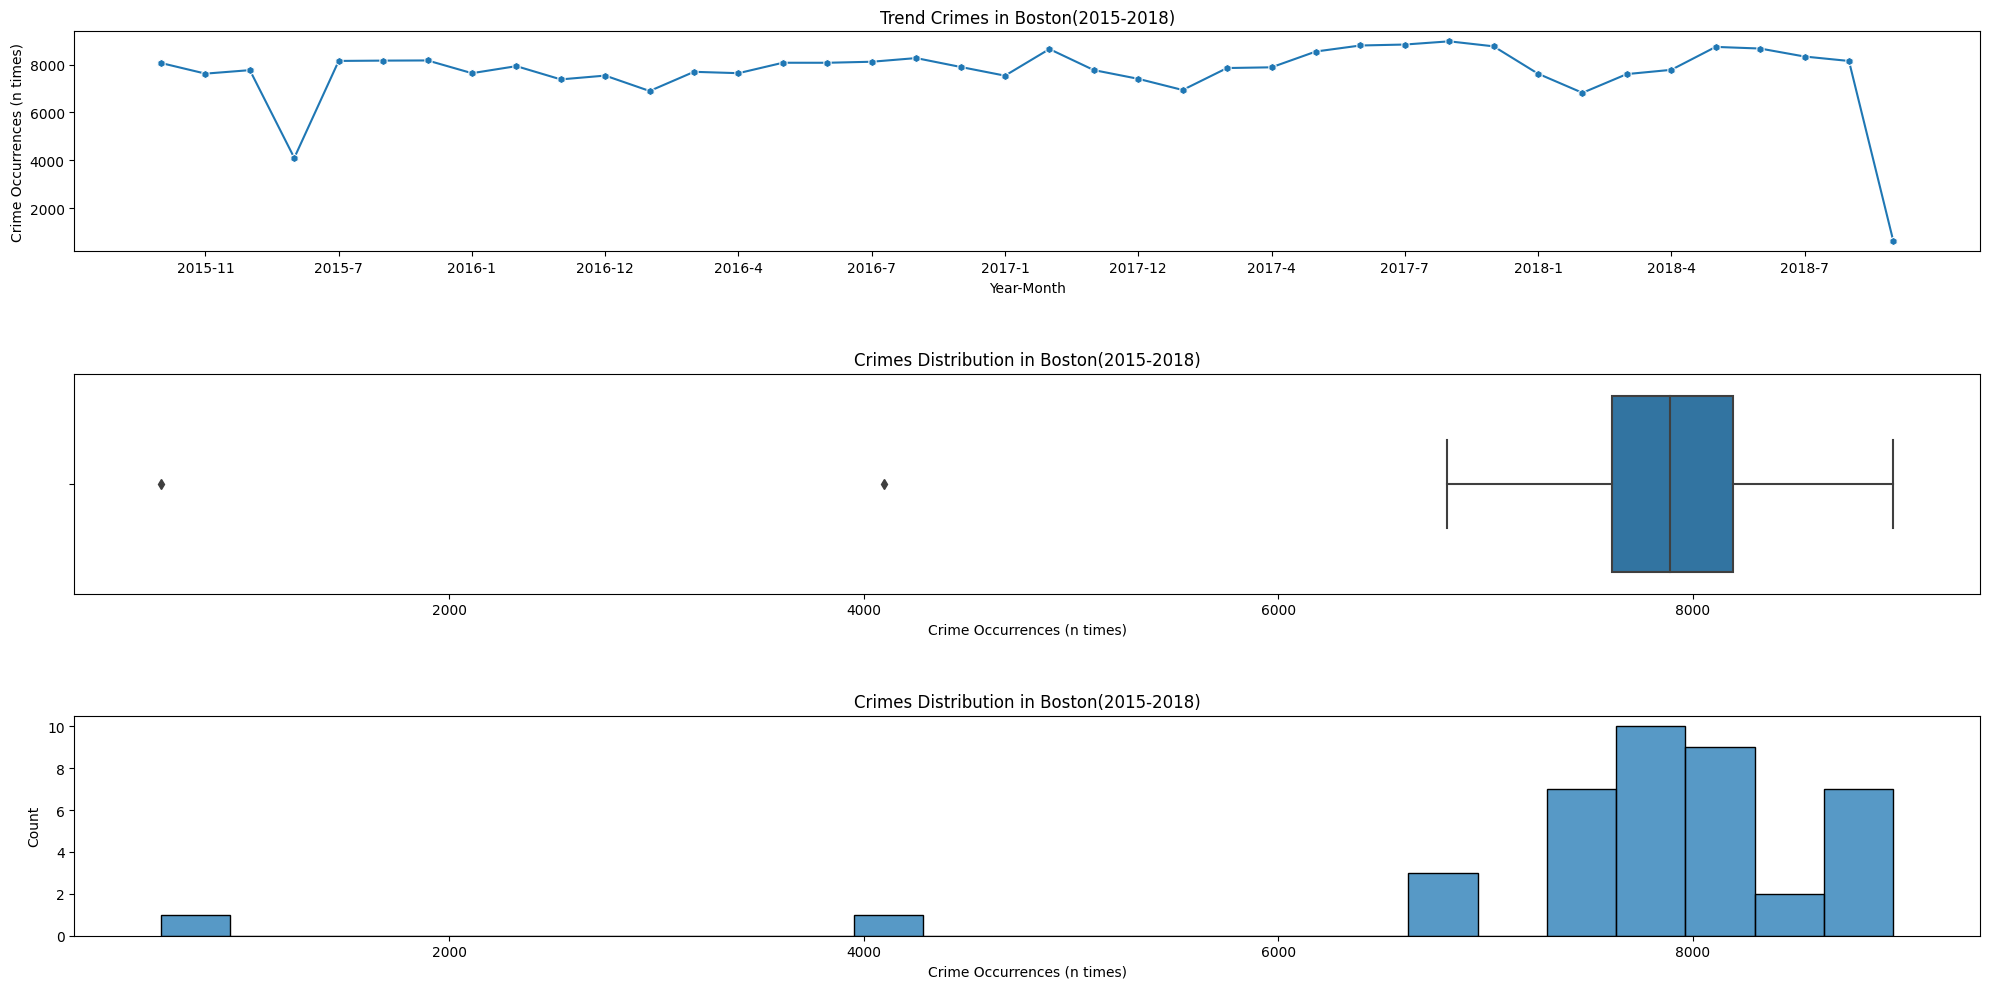

In [67]:
# Trend kriminilitasa di Boston (2015-2018)
az = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'MoYe',
    aggfunc='count'
)

plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
sns.lineplot(data=az,x='MoYe',y='INCIDENT_NUMBER',marker='h',dashes=True,markersize=6)
plt.title('Trend Crimes in Boston(2015-2018)')
plt.xticks(az.index.unique()[range(1,len(az.index.unique()),3)])
plt.ylabel('Crime Occurrences (n times)')
plt.xlabel('Year-Month')
plt.tight_layout()

plt.subplot(3,1,2)
sns.boxplot(x=az['INCIDENT_NUMBER'])
plt.title(f'\n\nCrimes Distribution in Boston(2015-2018)')
plt.tight_layout()
plt.xlabel('Crime Occurrences (n times)')

plt.subplot(3,1,3)
sns.histplot(x=az['INCIDENT_NUMBER'])
plt.title(f'\n\nCrimes Distribution in Boston(2015-2018)')
plt.xlabel('Crime Occurrences (n times)')
plt.tight_layout()

;

display(
az.transpose(),
f'normal test p-value ={normaltest(az["INCIDENT_NUMBER"])[1]} --> distribusi data tidak normal')

Insight :

Secara general, tingkat kriminalitas di Boston per bulannya berada pada kisaran 7612 - 8195 kejadian kriminalitas per bulan. Outlier hanya berada pada bulan June 2015 dan pada bulan September 2018, 


notes : Data outliers ini akan tetap dipakai dengan pertimbangan terdapat banyak informasi penting yang dapat diperoleh dari data outliers dalam pengolahan data. Data outliers akan mempengaruhi trend apabila data diolah dengan menggunakan kategori waktu seperti tahun, bulan.

- Data pada bulan June 2015 menjadi outlier dikarenakan pengumpulan data dimulari tanggal 15 Juni 2015 (2015-06-15 00:00:00) dan bukan tanggal 1 Juni 2015
- Data pada bulan September 2018 menjadi outlier dikarenakan pengumpulan data hanya sampai tanggal 3 September 2019 (2018-09-03 21:25:00) dan belum sampai tanggal 30 September 2019




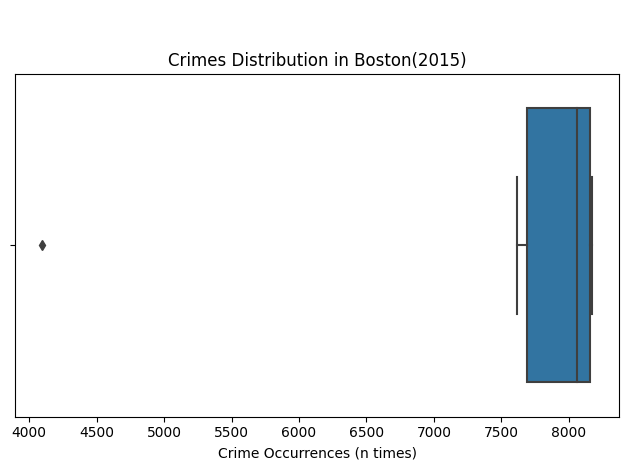

In [68]:
az = new_dfA[new_dfA['YEAR']==2015].pivot_table(
    'INCIDENT_NUMBER',
    'MONTH',
    aggfunc='count'
)
sns.boxplot(x=az['INCIDENT_NUMBER'])
plt.title(f'\n\nCrimes Distribution in Boston(2015)')
plt.tight_layout()
plt.xlabel('Crime Occurrences (n times)');

MONTH,1,2,3,4,5,6,7,8,9
INCIDENT_NUMBER,7616,6817,7600,7778,8736,8668,8334,8148,610


'normal test p-value =1.9507988248604676e-05 --> distribusi data tidak normal'

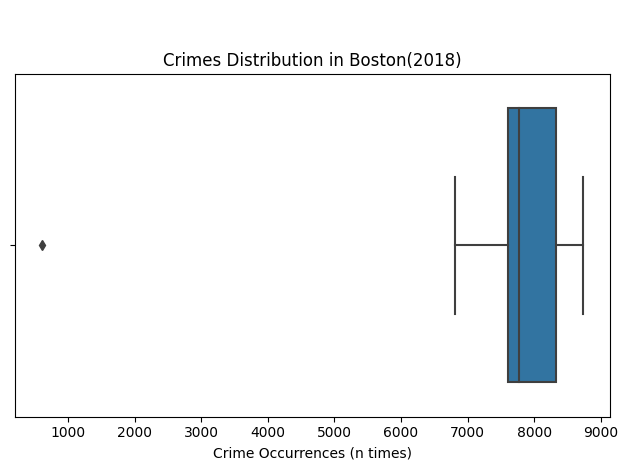

In [69]:
az = new_dfA[new_dfA['YEAR']==2018].pivot_table(
    'INCIDENT_NUMBER',
    'MONTH',
    aggfunc='count'
)
sns.boxplot(x=az['INCIDENT_NUMBER'])
plt.title(f'\n\nCrimes Distribution in Boston(2018)')
plt.tight_layout()
plt.xlabel('Crime Occurrences (n times)')
display(az.transpose(),
f'normal test p-value ={normaltest(az["INCIDENT_NUMBER"])[1]} --> distribusi data tidak normal');

Dikarenakan distribusi data pada tahun 2015 dan 2018 sangat sedikit maka akan dinggap terdistribusi normal, selanjutnya data perhitungan mean pada tahun 2015 dan 2018 akan dimodifikasi dengan cara mengkalibrasi pembagian kasus pada tahun tersebut sesuai dengan proporsi bulan pada tahun tersebut dibagi 12 bulan (tahun normal).

contoh:

tahun 2015 terdiri dari 6 bulan maka 10 kasus / (6 bulan /12 bulan) maka 10 kasus akan menjadi setara dengan 20 kasus

In [70]:
# membuat tabel total kejadian yang sudah dikalibrasi dengan UCR_PART

# mengkonversi pembagian pada setiap tahunnya dikarenakan jumlah bulan pada tahun 2015 dan 2018 berbeda
pb2015 = len(new_dfA[new_dfA['YEAR']==2015]['MONTH'].unique())
pb2016 = len(new_dfA[new_dfA['YEAR']==2016]['MONTH'].unique())
pb2017 = len(new_dfA[new_dfA['YEAR']==2017]['MONTH'].unique())
pb2018 = len(new_dfA[new_dfA['YEAR']==2018]['MONTH'].unique())


aa = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    ['YEAR','DISTRICT','STREET'],
    ['UCR_PART'],
    'count'
).reset_index().fillna(0)
aa['Multi'] = np.select(
    [(aa['Other']> 0),(aa['Part One']> 0),(aa['Part Three']> 0),(aa['Part Two']> 0)],
    [aa['Other']*1+aa['Part One']*1.2+aa['Part Three']*1.05+aa['Part Two']*1.1,aa['Other']*1+aa['Part One']*1.2+aa['Part Three']*1.05+aa['Part Two']*1.1,aa['Other']*1+aa['Part One']*1.2+aa['Part Three']*1.05+aa['Part Two']*1.1,aa['Other']*1+aa['Part One']*1.2+aa['Part Three']*1.05+aa['Part Two']*1.1])
aa= aa.drop(columns=aa.columns[3:-1]).pivot_table(
    'Multi',
    ['YEAR'],
    'DISTRICT',
    aggfunc='sum'
).reset_index()
aa.columns.names=[None]
aa.loc[len(aa.index)] = ['Mean']+list(aa.sum()[1:]/((pb2015+pb2016+pb2017+pb2018)/12)) 
aa = np.ceil(aa.set_index('YEAR',drop=True)).astype('int')
aa['Total'] = aa.sum(axis=1)
display(aa,f'notes : mean pada tabel telah dikalibrasi berdasarkan jumlah bulan pada setiap di tahunnya, kalibrasi dibutuhkan karena jumlah bulan pada 2015 dan 2018 bukan 12 bulan')

,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5,Total
YEAR,,,,,,,,,,,,,
2015,6548,1119,2616,9181,6026,7880,4272,3569,7788,3002,2945,2349,57295
2016,11025,2063,4360,16097,11594,14237,7347,6551,13253,5788,5451,4234,102000
2017,12056,2324,4537,16686,11988,14151,7531,6972,14158,5897,6013,4621,106934
2018,8031,1415,2931,10617,8075,8893,5487,4388,9419,3947,4055,2961,70219
Mean,11298,2076,4333,15774,11305,13548,7391,6444,13385,5590,5539,4249,100932


'notes : mean pada tabel telah dikalibrasi berdasarkan jumlah bulan pada setiap di tahunnya, kalibrasi dibutuhkan karena jumlah bulan pada 2015 dan 2018 bukan 12 bulan'

In [71]:
# menghitung police officer dan police station
police = np.ceil(aa/30).astype('int')
station = np.ceil(aa/3000).astype('int')
display(police,station)

,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5,Total
YEAR,,,,,,,,,,,,,
2015,219,38,88,307,201,263,143,119,260,101,99,79,1910
2016,368,69,146,537,387,475,245,219,442,193,182,142,3400
2017,402,78,152,557,400,472,252,233,472,197,201,155,3565
2018,268,48,98,354,270,297,183,147,314,132,136,99,2341
Mean,377,70,145,526,377,452,247,215,447,187,185,142,3365


,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5,Total
YEAR,,,,,,,,,,,,,
2015,3,1,1,4,3,3,2,2,3,2,1,1,20
2016,4,1,2,6,4,5,3,3,5,2,2,2,34
2017,5,1,2,6,4,5,3,3,5,2,3,2,36
2018,3,1,1,4,3,3,2,2,4,2,2,1,24
Mean,4,1,2,6,4,5,3,3,5,2,2,2,34


## Analysis Crimes in Boston

In [72]:
# Shooting in Boston (2015-2018)
ag = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'SHOOTING',
    aggfunc='count'
)
ag

,INCIDENT_NUMBER
SHOOTING,
N,306409
Y,989


,Part One,Part Two,Part Three,Other
YEAR,,,,
2015,12029,17284,22555,159
2016,18466,28868,45459,348
2017,17990,28633,50874,426
2018,11647,19146,33259,255


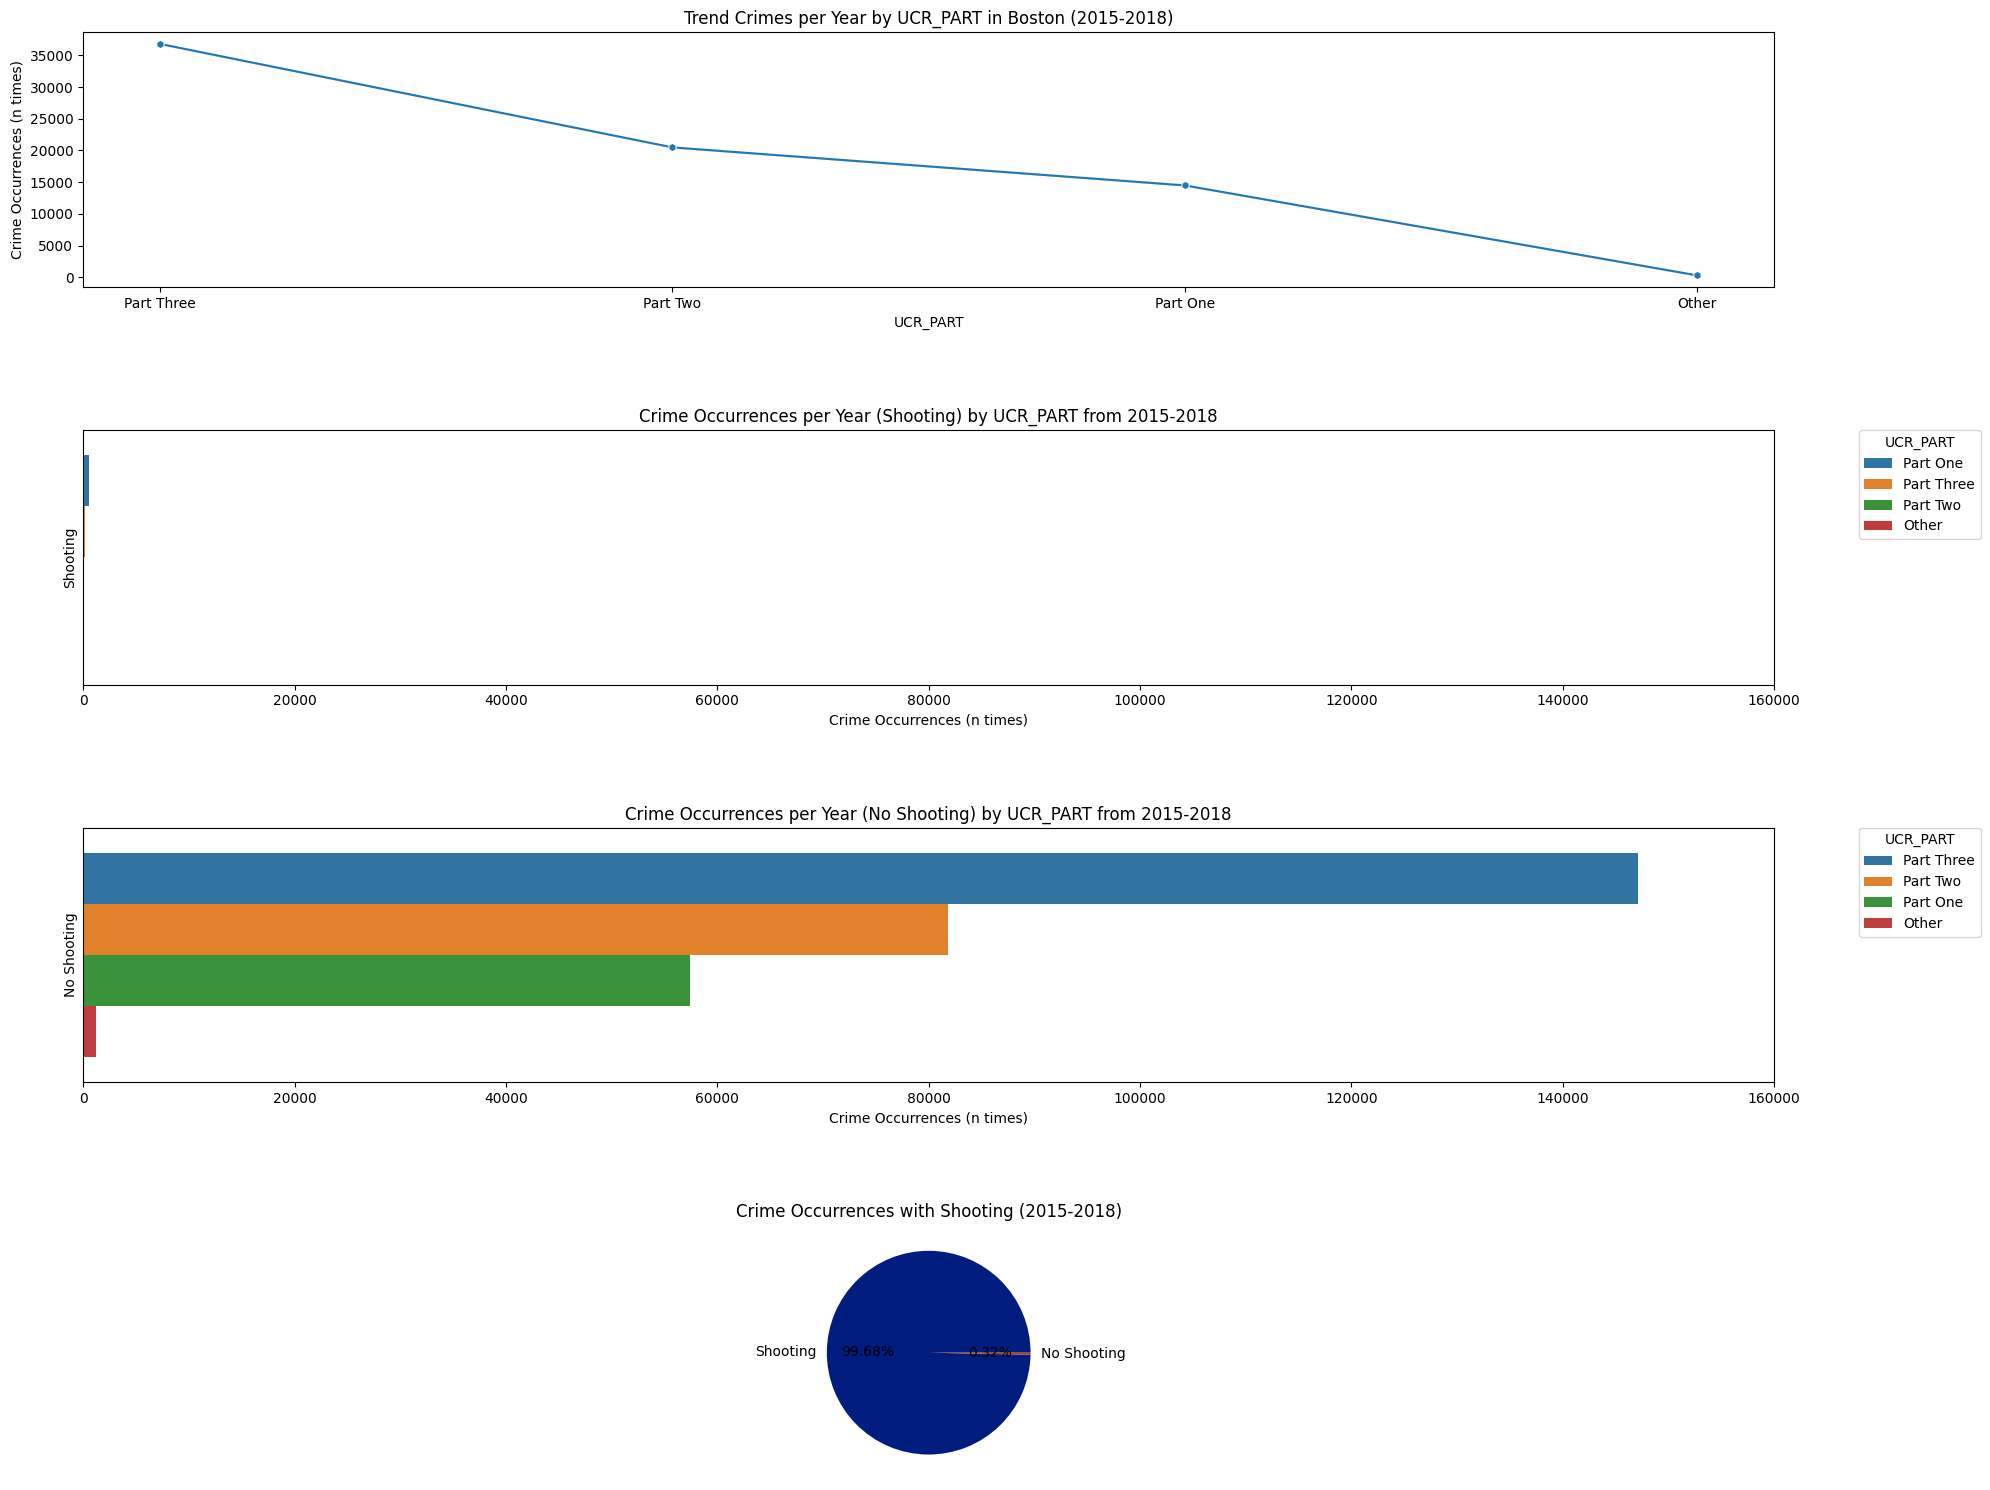

In [73]:
# Trend crimes in Boston per Year by UCR_PART
plt.figure(figsize=(20,15))

plt.subplot(4,1,1)
sns.lineplot(data=new_dfA.groupby(['YEAR','UCR_PART'])[['INCIDENT_NUMBER']].nunique().reset_index().sort_values('INCIDENT_NUMBER',ascending=False),x='UCR_PART',y='INCIDENT_NUMBER',marker='h',dashes=True,markersize=6,ci=0)
plt.title('Trend Crimes per Year by UCR_PART in Boston (2015-2018)')
plt.ylabel('Crime Occurrences (n times)')
plt.tight_layout()
;

plt.subplot(4,1,2)
sns.barplot(data=new_dfA.groupby(['SHOOTING','UCR_PART'])[['INCIDENT_NUMBER']].nunique().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)[new_dfA.groupby(['SHOOTING','UCR_PART'])[['INCIDENT_NUMBER']].nunique().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)['SHOOTING']=='Y']
,y='SHOOTING',hue='UCR_PART',x='INCIDENT_NUMBER')
plt.title(f'\n\n\nCrime Occurrences per Year (Shooting) by UCR_PART from 2015-2018')
plt.xticks(range(0,160001,20000))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='UCR_PART')
plt.xlabel('Crime Occurrences (n times)')
plt.ylabel('Shooting')
plt.yticks([])
plt.tight_layout()
;

plt.subplot(4,1,3)
sns.barplot(data=new_dfA.groupby(['SHOOTING','UCR_PART'])[['INCIDENT_NUMBER']].nunique().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)[new_dfA.groupby(['SHOOTING','UCR_PART'])[['INCIDENT_NUMBER']].nunique().reset_index().sort_values('INCIDENT_NUMBER',ascending=False)['SHOOTING']=='N']
,y='SHOOTING',hue='UCR_PART',x='INCIDENT_NUMBER',estimator='median')
plt.title(f'\n\n\nCrime Occurrences per Year (No Shooting) by UCR_PART from 2015-2018')
plt.xticks(range(0,160001,20000))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='UCR_PART')
plt.xlabel('Crime Occurrences (n times)')
plt.ylabel('No Shooting')
plt.yticks([])
plt.tight_layout()
;

ag = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'SHOOTING',
    aggfunc='count'
)
ag

plt.subplot(4,1,4)
plt.pie(ag['INCIDENT_NUMBER'], labels=['Shooting','No Shooting'], colors=sns.color_palette('dark'),autopct='%.2f%%');
plt.title('Crime Occurrences with Shooting (2015-2018)')

ac = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    ['YEAR'],
    'UCR_PART',
    'count').reset_index()
ac.columns.names=[None]
ac = np.ceil(ac.set_index('YEAR',drop=True)).astype('int')
ac['Total'] = ac.sum(axis=1)
ac[['Part One','Part Two','Part Three','Other']]

Insight :

Pada tahun 2015-2018, kriminalitas di Boston didominasi oleh kriminalitas dengan tingkat kejahatan level 3 (UCR_PART = 3). Dari semua tindakan kriminilitas yang terjadi sebagian besar kriminalitas (99.68%) terjadi tanpa adanya kejadian penembakan dan hanya 0.32% kriminalitas yang melibatkan penembakan.

Berdasarkan data yang ada saat ini, direkomendasikan agar Boston Police Deparment menempatkan lebih banyak police officer dan station pada district B2, C11, D4. Untuk lebih detailnya, akan dibahas setelah melakukan analisa lanjutan pada kategori area.

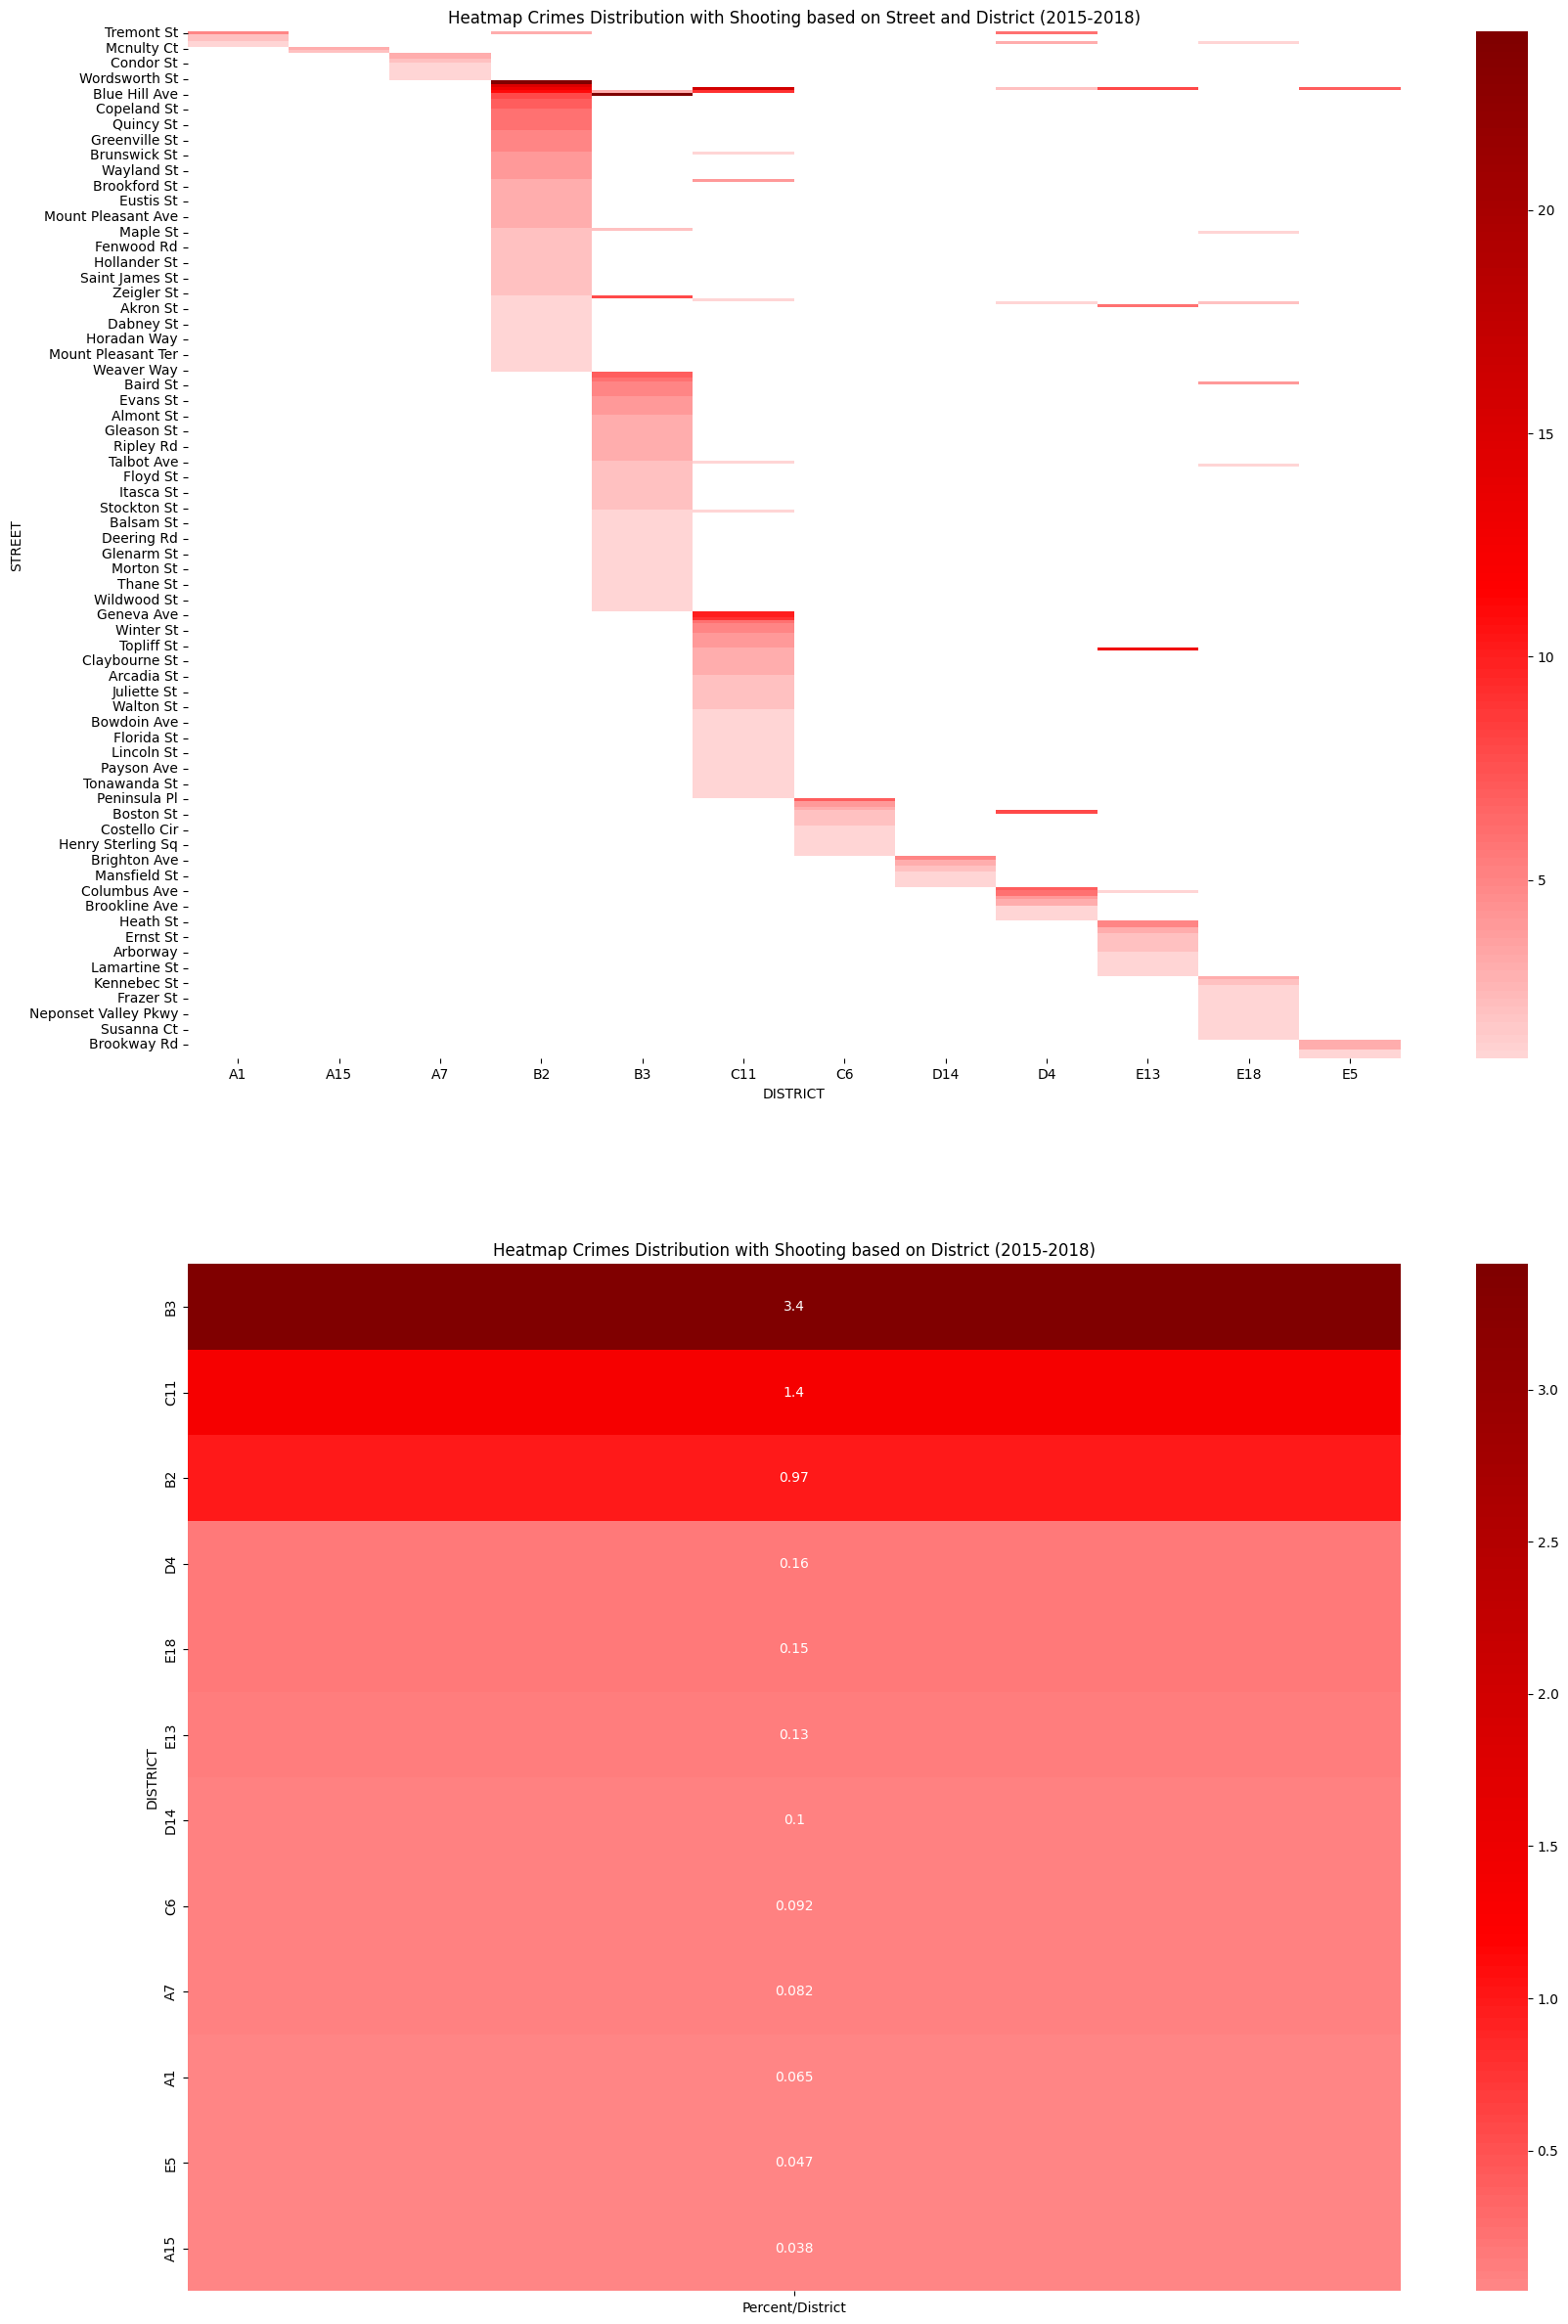

In [74]:
# Heatmap based on District and Street
af = new_dfA[new_dfA['SHOOTING']=='Y'].pivot_table(
    'INCIDENT_NUMBER',
    'STREET',
    'DISTRICT',
    aggfunc='count'
)
ag = new_dfA[new_dfA['SHOOTING']=='Y'].pivot_table(
    'INCIDENT_NUMBER',
    'DISTRICT',
    aggfunc='count'
).sort_values('INCIDENT_NUMBER',ascending=False)

aj = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    ['YEAR'],
    'DISTRICT',
    'count').reset_index()
aj.columns.names=[None]
aj.loc[len(aj.index)] = ['Total']+list(aj.sum()[1:]) 
aj = np.ceil(aj.set_index('YEAR',drop=True)).astype('int')
aj['Total'] = aj.sum(axis=1)

aj

ag['Total'] = list(aj.loc['Total'][:-1])
ag['Percent/District'] = ag['INCIDENT_NUMBER']/ag['Total']*100
ag

af = af.sort_values(list(af.columns),ascending=False)
plt.figure(figsize=(20,30))
plt.subplot(2,1,1)
plt.title('Heatmap Crimes Distribution with Shooting based on Street and District (2015-2018)')
afh = sns.heatmap(af, square=False,cmap='seismic',center=-1)
plt.subplot(2,1,2)
plt.title('Heatmap Crimes Distribution with Shooting based on District (2015-2018)')
agh = sns.heatmap(ag[['Percent/District']].sort_values('Percent/District',ascending=False), square=False,cmap='seismic',center=-1, annot=True)
afh;

agh;

# display(ag)

Insight :

Pada tahun 2015-2018, kriminalitas dengan penembakan terbanyak terjadi pada district B3(Baird St, Evans St, Almont St) sebesar 3.41%, C11 (Winter St, Topliff St, Claybourne St) sebesar 1.36% dan B2 (Wordsworth St, Blue Hill Ave, Copeland St) sebesar 0.97%. 

- B3
Interpretasi angka 3.41% menandakan bahwa dari seluruh kasus kriminalitas yang terjadi di district B3 terdapat 3.41% kasus penembakan yang terjadi pada tahun 2015-2018

- C11
Interpretasi angka 1.36% menandakan bahwa dari seluruh kasus kriminalitas yang terjadi di district C11 terdapat 1.36% kasus penembakan yang terjadi pada tahun 2015-2018

- B2
Interpretasi angka 0.97% menandakan bahwa dari seluruh kasus kriminalitas yang terjadi di district B2 terdapat 0.97% kasus penembakan yang terjadi pada tahun 2015-2018

Dikarenakan pada 3 District tersebut, banyak tersebut cukup banyak terjadi kriminalitas dengan penembakan. Maka ketika bertugas police officer harus memperhatikan secara lebih detail pada area yang rawan penembakan tersebut. 

In [75]:
# plt.figure(figsize=(20,10))

# plt.subplot(2,1,1)
# sns.barplot(data=new_dfA.groupby(['DISTRICT'])[['INCIDENT_NUMBER']].nunique().reset_index().sort_values('INCIDENT_NUMBER',ascending=False),y='DISTRICT',x='INCIDENT_NUMBER',color='red')
# plt.title('Crime Occurances per District')
# plt.xlabel('Crime Occurances (n times)')
# plt.ylabel('District')
# plt.tight_layout()
# ;

# plt.subplot(2,1,2)
# sns.barplot(data=new_dfA.groupby(['DISTRICT','UCR_PART'])[['INCIDENT_NUMBER']].nunique().reset_index().sort_values('INCIDENT_NUMBER',ascending=False),y='DISTRICT',hue='UCR_PART',x='INCIDENT_NUMBER')
# plt.title(f'\n\n\nCrime Occurances per District by UCR_PART')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='UCR_PART')
# plt.xlabel('Crime Occurances (n times)')
# plt.ylabel('District')
# plt.tight_layout()
# ;



''

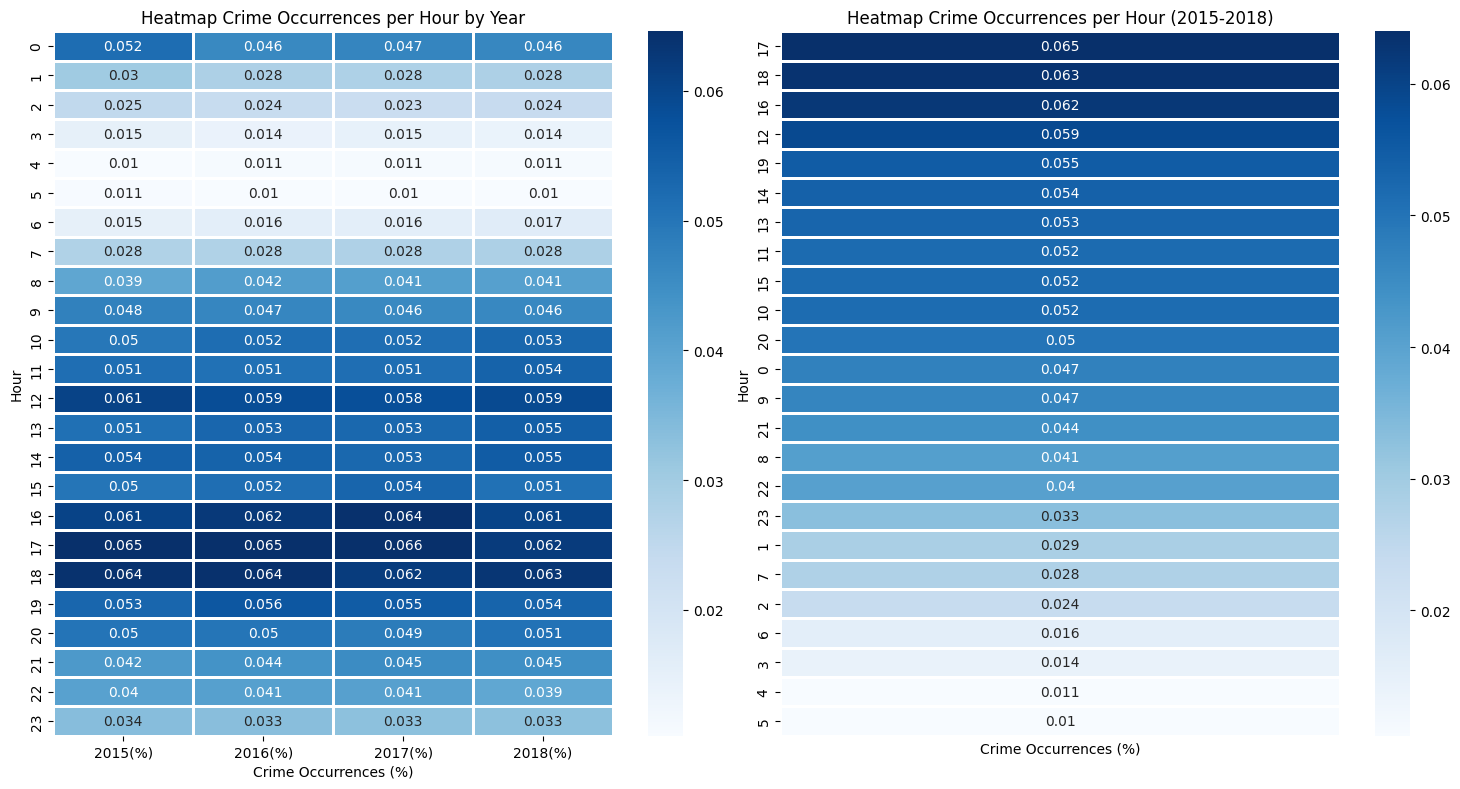

In [76]:
# Heatmap hour
plt.figure(figsize=(15,8))
ad = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'HOUR',
    'YEAR',
    'count'
)
ad['2015(%)']=ad[2015]/ad.sum()[2015]
ad['2016(%)']=ad[2016]/ad.sum()[2016]
ad['2017(%)']=ad[2017]/ad.sum()[2017]
ad['2018(%)']=ad[2018]/ad.sum()[2018]

ae = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'HOUR',
    aggfunc='count'
)
ae['Percent'] = ae['INCIDENT_NUMBER']/ae.sum()[0]
ae = ae.sort_values('Percent',ascending=False)

plt.subplot(1,2,1)
sns.heatmap(data=ad[['2015(%)','2016(%)','2017(%)','2018(%)']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per Hour by Year')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('Hour')
plt.tight_layout()
;

plt.subplot(1,2,2)
sns.heatmap(data=ae[['Percent']],cmap="Blues",robust=True, linewidths=2, annot=True, square=False)
plt.title('Heatmap Crime Occurrences per Hour (2015-2018)')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('Hour')
plt.xticks([])
plt.tight_layout()
;
# display(ad)

Insight :

Berdasarkan 'Heatmap Crime Occurrences per Hour by Year', dapat dilihat bahwa persentase kriminalitas yang terjadi antara setiap tahunnya cukup seragam ini dapat dilihat dari heatmap persentase kriminalitas pada jam yang sama dengan tahun yang berbeda, memiliki warna yang cenderung sama (ini menandakan perubahan persentase kriminalitas pada jam tersebut tidak signifikan antara tahunnya). Dengan demikian dapat disimpulkan kriminalitas yang terjadi antara tahun 2015-2018  banyak terjadi pada jam yang sama yaitu jam 17,18,16. Data ini dijelaskan lebih lanjut pada grafik 'Heatmap Crime Occurrences per Hour (2015-2018)'. Heatmatp ini mengindikasikan bahwa terdapat korelasi yang kuat antara jam dengan jumlah kejadian kriminalitas.

''

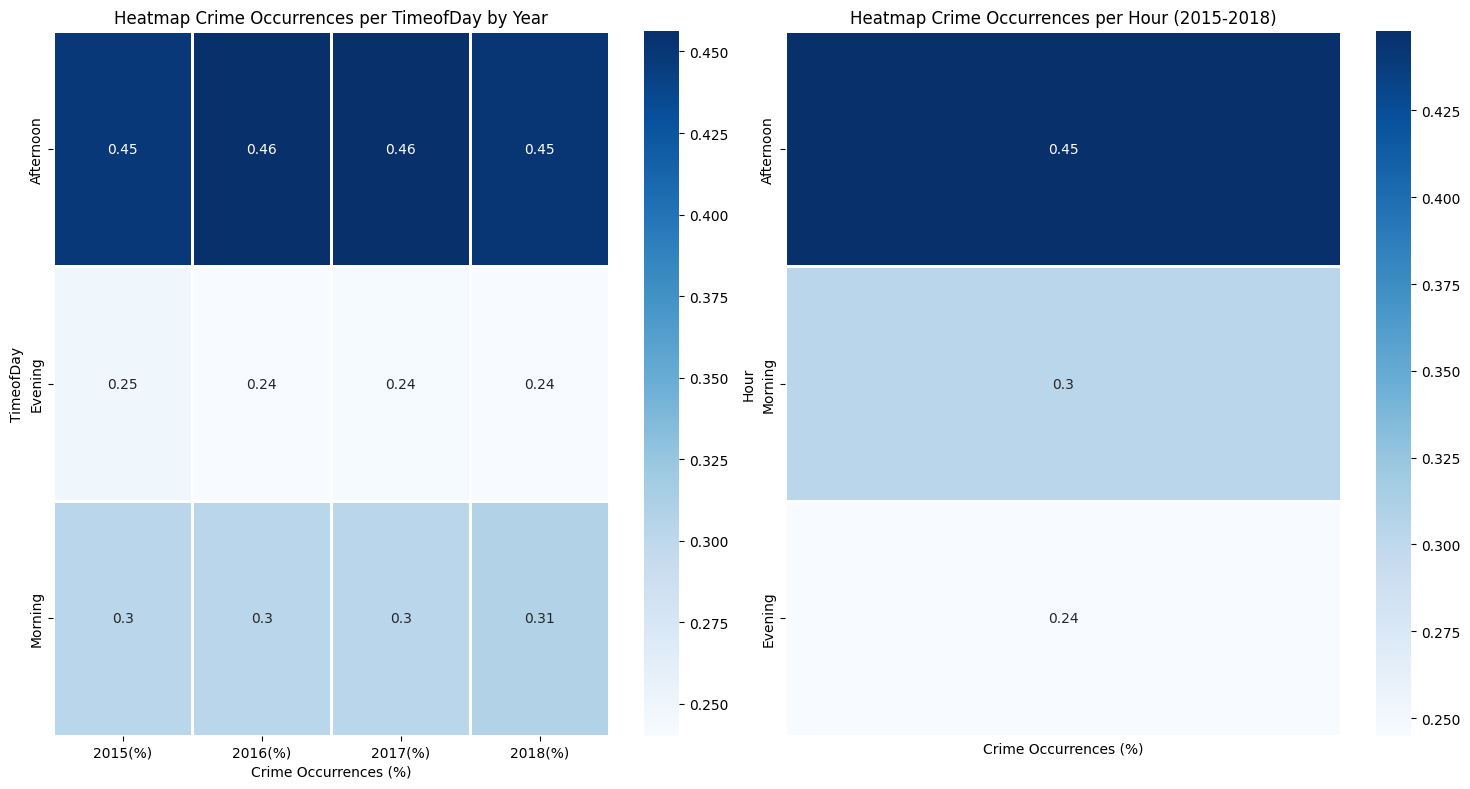

In [77]:
# heatmap time of day
plt.figure(figsize=(15,8))
ad = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'TimeofDay',
    'YEAR',
    'count'
)
ad['2015(%)']=ad[2015]/ad.sum()[2015]
ad['2016(%)']=ad[2016]/ad.sum()[2016]
ad['2017(%)']=ad[2017]/ad.sum()[2017]
ad['2018(%)']=ad[2018]/ad.sum()[2018]

ae = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'TimeofDay',
    aggfunc='count'
)
ae['Percent'] = ae['INCIDENT_NUMBER']/ae.sum()[0]
ae = ae.sort_values('Percent',ascending=False)


plt.subplot(1,2,1)
sns.heatmap(data=ad[['2015(%)','2016(%)','2017(%)','2018(%)']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per TimeofDay by Year')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('TimeofDay')
plt.tight_layout()
;

plt.subplot(1,2,2)
sns.heatmap(data=ae[['Percent']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per Hour (2015-2018)')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('Hour')
plt.xticks([])
plt.tight_layout()
;

Pada heatmap DayofTime ini dapat dilihat bahwa sebagian besar kriminalitas terjadi pada waktu siang ('afternoon') sebesar 45%. Pada kasus ini, terdapat 3 kategori 'time of day' yaitu 

- 'morning' dikategorikan pada rentang waktu 05.00 sampai jam 12.59

- 'afternoon' dikategorikan pada rentang waktu 13.00 sampai jam 20.59

- 'evening' dikategorikan pada rentang waktu 21.00 sampai jam 04.59

''

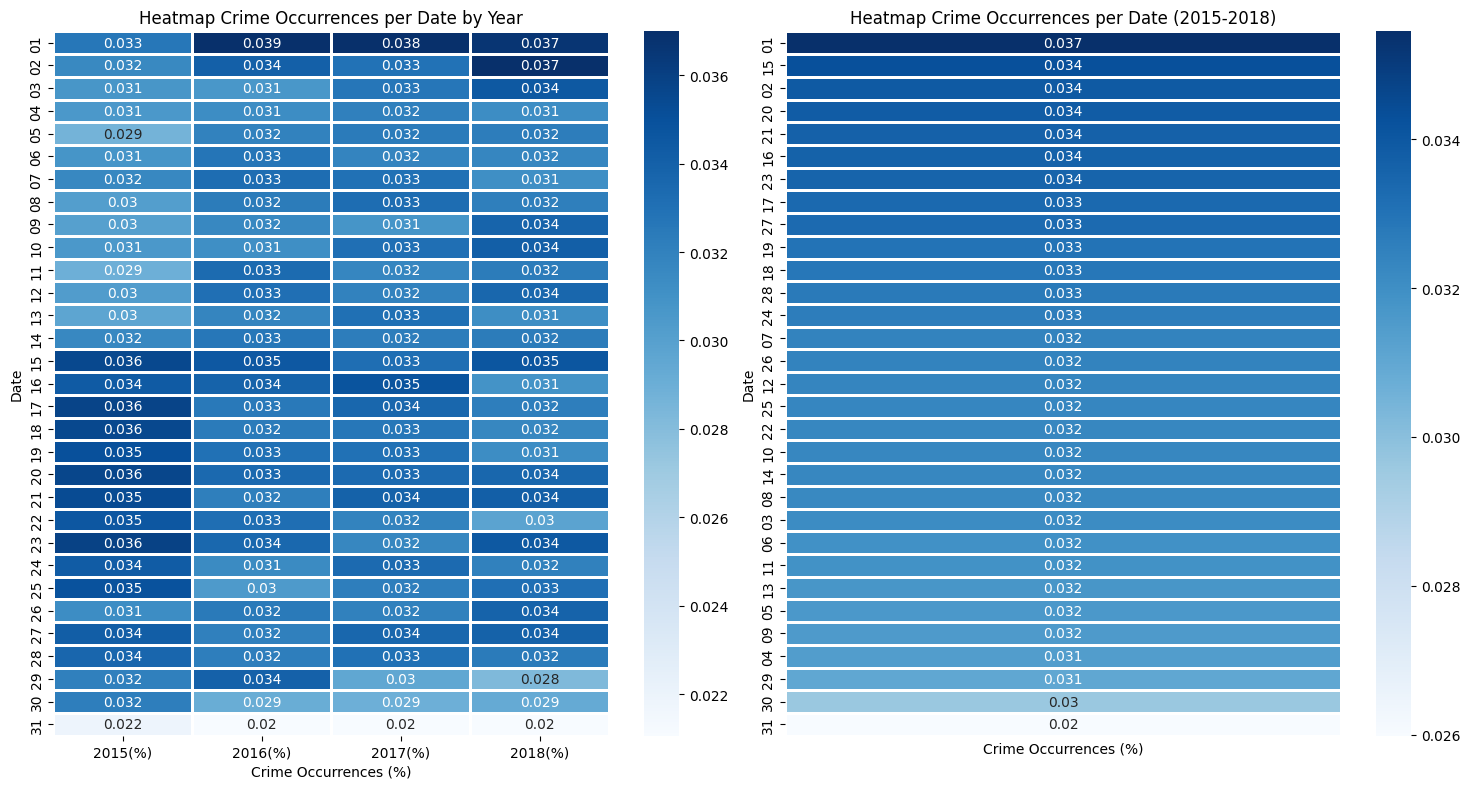

In [78]:
# Heatmap date
plt.figure(figsize=(15,8))
ad = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'Date',
    'YEAR',
    'count'
)
ad['2015(%)']=ad[2015]/ad.sum()[2015]
ad['2016(%)']=ad[2016]/ad.sum()[2016]
ad['2017(%)']=ad[2017]/ad.sum()[2017]
ad['2018(%)']=ad[2018]/ad.sum()[2018]


ae = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'Date',
    aggfunc='count'
)
ae['Percent'] = ae['INCIDENT_NUMBER']/ae.sum()[0]
ae = ae.sort_values('Percent',ascending=False)

plt.subplot(1,2,1)
sns.heatmap(data=ad[['2015(%)','2016(%)','2017(%)','2018(%)']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per Date by Year')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('Date')
plt.tight_layout()
;

plt.subplot(1,2,2)
sns.heatmap(data=ae[['Percent']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per Date (2015-2018)')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('Date')
plt.xticks([])
plt.tight_layout()
;


Insight :

Berdasarkan 'Heatmap Crime Occurrences per Date by Year' dapat dilihat bahwa secara umum persentase kriminalitas yang terjadi pada tanggal yang sama dengan tahun yang berbeda sering berubah - ubah (perbedaan warna antara tahun jauh). Namun secara umum dapat dilihat bahwa tingkat kriminalitas banyak terjadi ketika pada tanggal 1 di setiap bulan selama tahun 2015 - 2018. Pada 'Heatmap Crime Occurrences per Date (2015-2018)' juga terlihat bahwa persentase tingkat kriminalitas tertinggi cenderung terjadi pada tanggal 1 setiap bulannya.

''

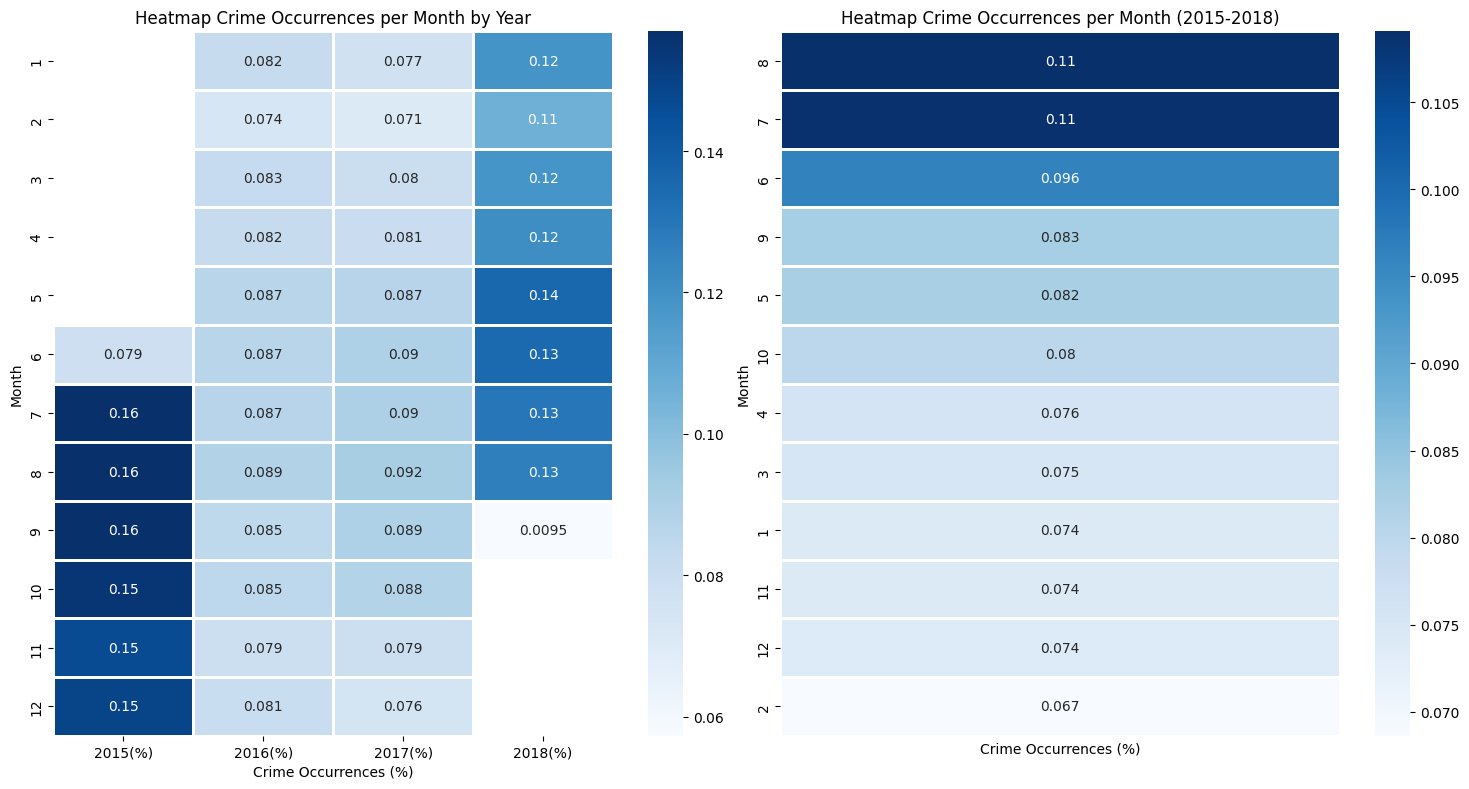

In [79]:
# Heatmap month
plt.figure(figsize=(15,8))
ad = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'MONTH',
    'YEAR',
    'count'
)
ad['2015(%)']=ad[2015]/ad.sum()[2015]
ad['2016(%)']=ad[2016]/ad.sum()[2016]
ad['2017(%)']=ad[2017]/ad.sum()[2017]
ad['2018(%)']=ad[2018]/ad.sum()[2018]


ae = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'MONTH',
    aggfunc='count'
)
ae['Percent'] = ae['INCIDENT_NUMBER']/ae.sum()[0]
ae = ae.sort_values('Percent',ascending=False)

plt.subplot(1,2,1)
sns.heatmap(data=ad[['2015(%)','2016(%)','2017(%)','2018(%)']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per Month by Year')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('Month')
plt.tight_layout()
;

plt.subplot(1,2,2)
sns.heatmap(data=ae[['Percent']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per Month (2015-2018)')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('Month')
plt.xticks([])
plt.tight_layout()
;

# display(ad)

Insight :

Berdasarkan 'Heatmap Crime Occurrences per Month by Year' dapat dilihat bahwa secara umum persentase kriminilitas yang terjadi pada bulan yang sama dengan tahun yang berbeda sering berubah - ubah (perbedaan warna antara tahun jauh). Namun secara umum dapat dilihat bahwa tingkat kriminalitas banyak terjadi ketika pada bulan July dan Agustus di setiap bulan selama tahun 2015 - 2018. Pada 'Heatmap Crime Occurrences per Month (2015-2018)' juga terlihat bahwa persentase tingkat kriminalitas tertinggi cenderung terjadi pada tanggal Juni, July dan Agustus setiap tahunnya. Ini menandakan adanya korelasi yang kuat antara bulan dengan jumlah kriminalitas yang terjadi

''

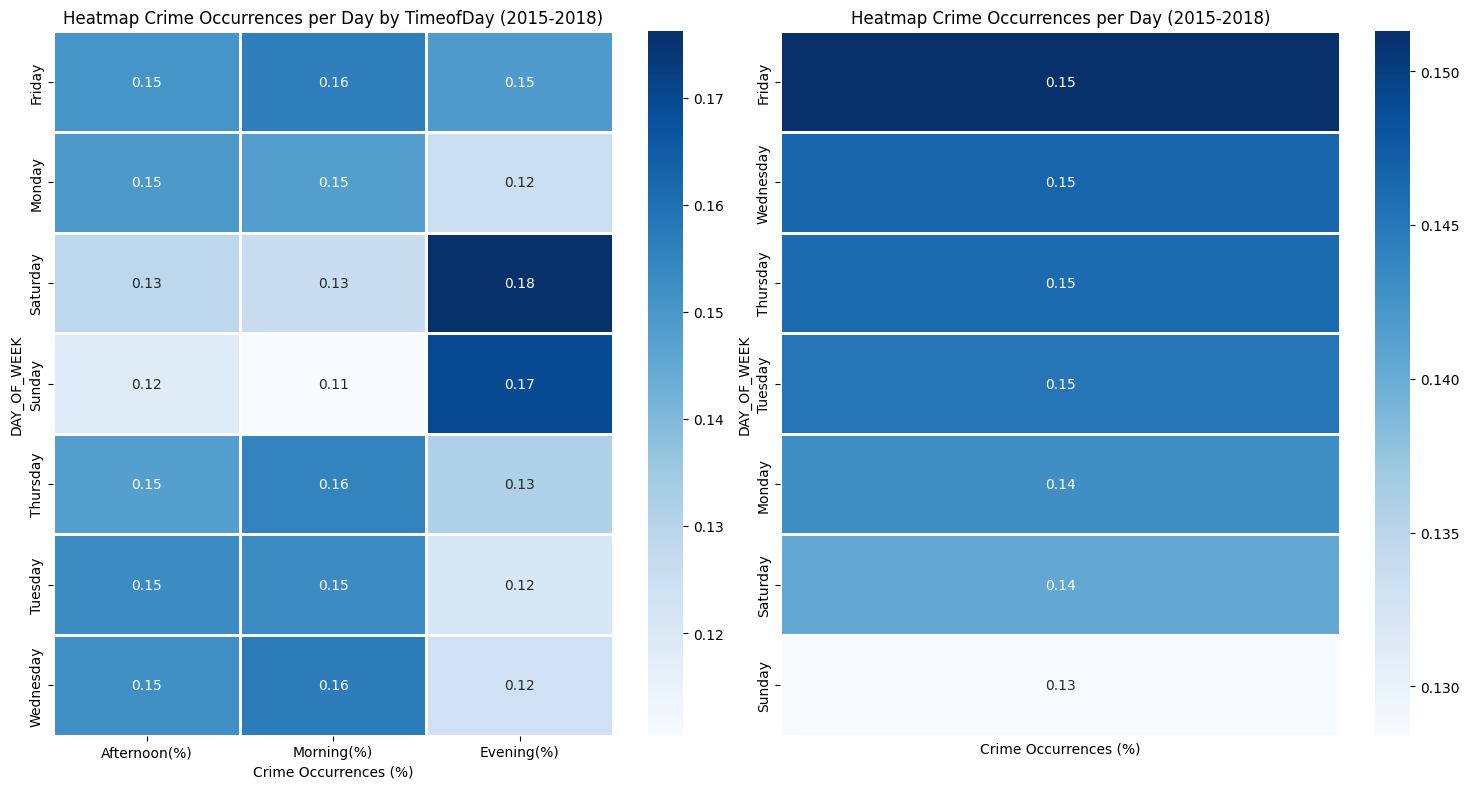

In [80]:
# Heatmap day
plt.figure(figsize=(15,8))
ad = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'DAY_OF_WEEK',
    'TimeofDay',
    'count'
)
ad['Afternoon(%)']=ad['Afternoon']/ad.sum()['Afternoon']
ad['Morning(%)']=ad['Morning']/ad.sum()['Morning']
ad['Evening(%)']=ad['Evening']/ad.sum()['Evening']

ae = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'DAY_OF_WEEK',
    aggfunc='count'
)
ae['Percent'] = ae['INCIDENT_NUMBER']/ae.sum()[0]
ae = ae.sort_values('Percent',ascending=False)

plt.subplot(1,2,1)
sns.heatmap(data=ad[['Afternoon(%)','Morning(%)','Evening(%)']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per Day by TimeofDay (2015-2018)')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('DAY_OF_WEEK')
plt.tight_layout()
;

plt.subplot(1,2,2)
sns.heatmap(data=ae[['Percent']],cmap="Blues",robust=True, linewidths=2, square=False, annot=True)
plt.title('Heatmap Crime Occurrences per Day (2015-2018)')
plt.xlabel('Crime Occurrences (%)')
plt.ylabel('DAY_OF_WEEK')
plt.xticks([])
plt.tight_layout()
;

# display(ad)

Insight :

Berdasarkan 'Heatmap Crime Occurrences per Day by TimeofDay (2015-2018)' dapat dilihat bahwa secara umum persentase kriminalitas yang terjadi ketika pagi dan siang hari paling banyak terjadi saat weekday (Monday - Friday) sedangkan persentase kriminalitas yang terjadi ketika malam hari paling banyak terjadi saat weekday (Saturday - Sunday)

Kemudian bila dijabarkan lebih lanjut pada tabel 'Heatmap Crime Occurrences per Day (2015-2018)', dapat dilihat distribusi persentase jumlah kriminalitas data antara harinya cukup seragam 0.13 - 0.15. Hari 'Friday' merupakan persentase dengan jumlah tingkat kriminalitas terbanyak

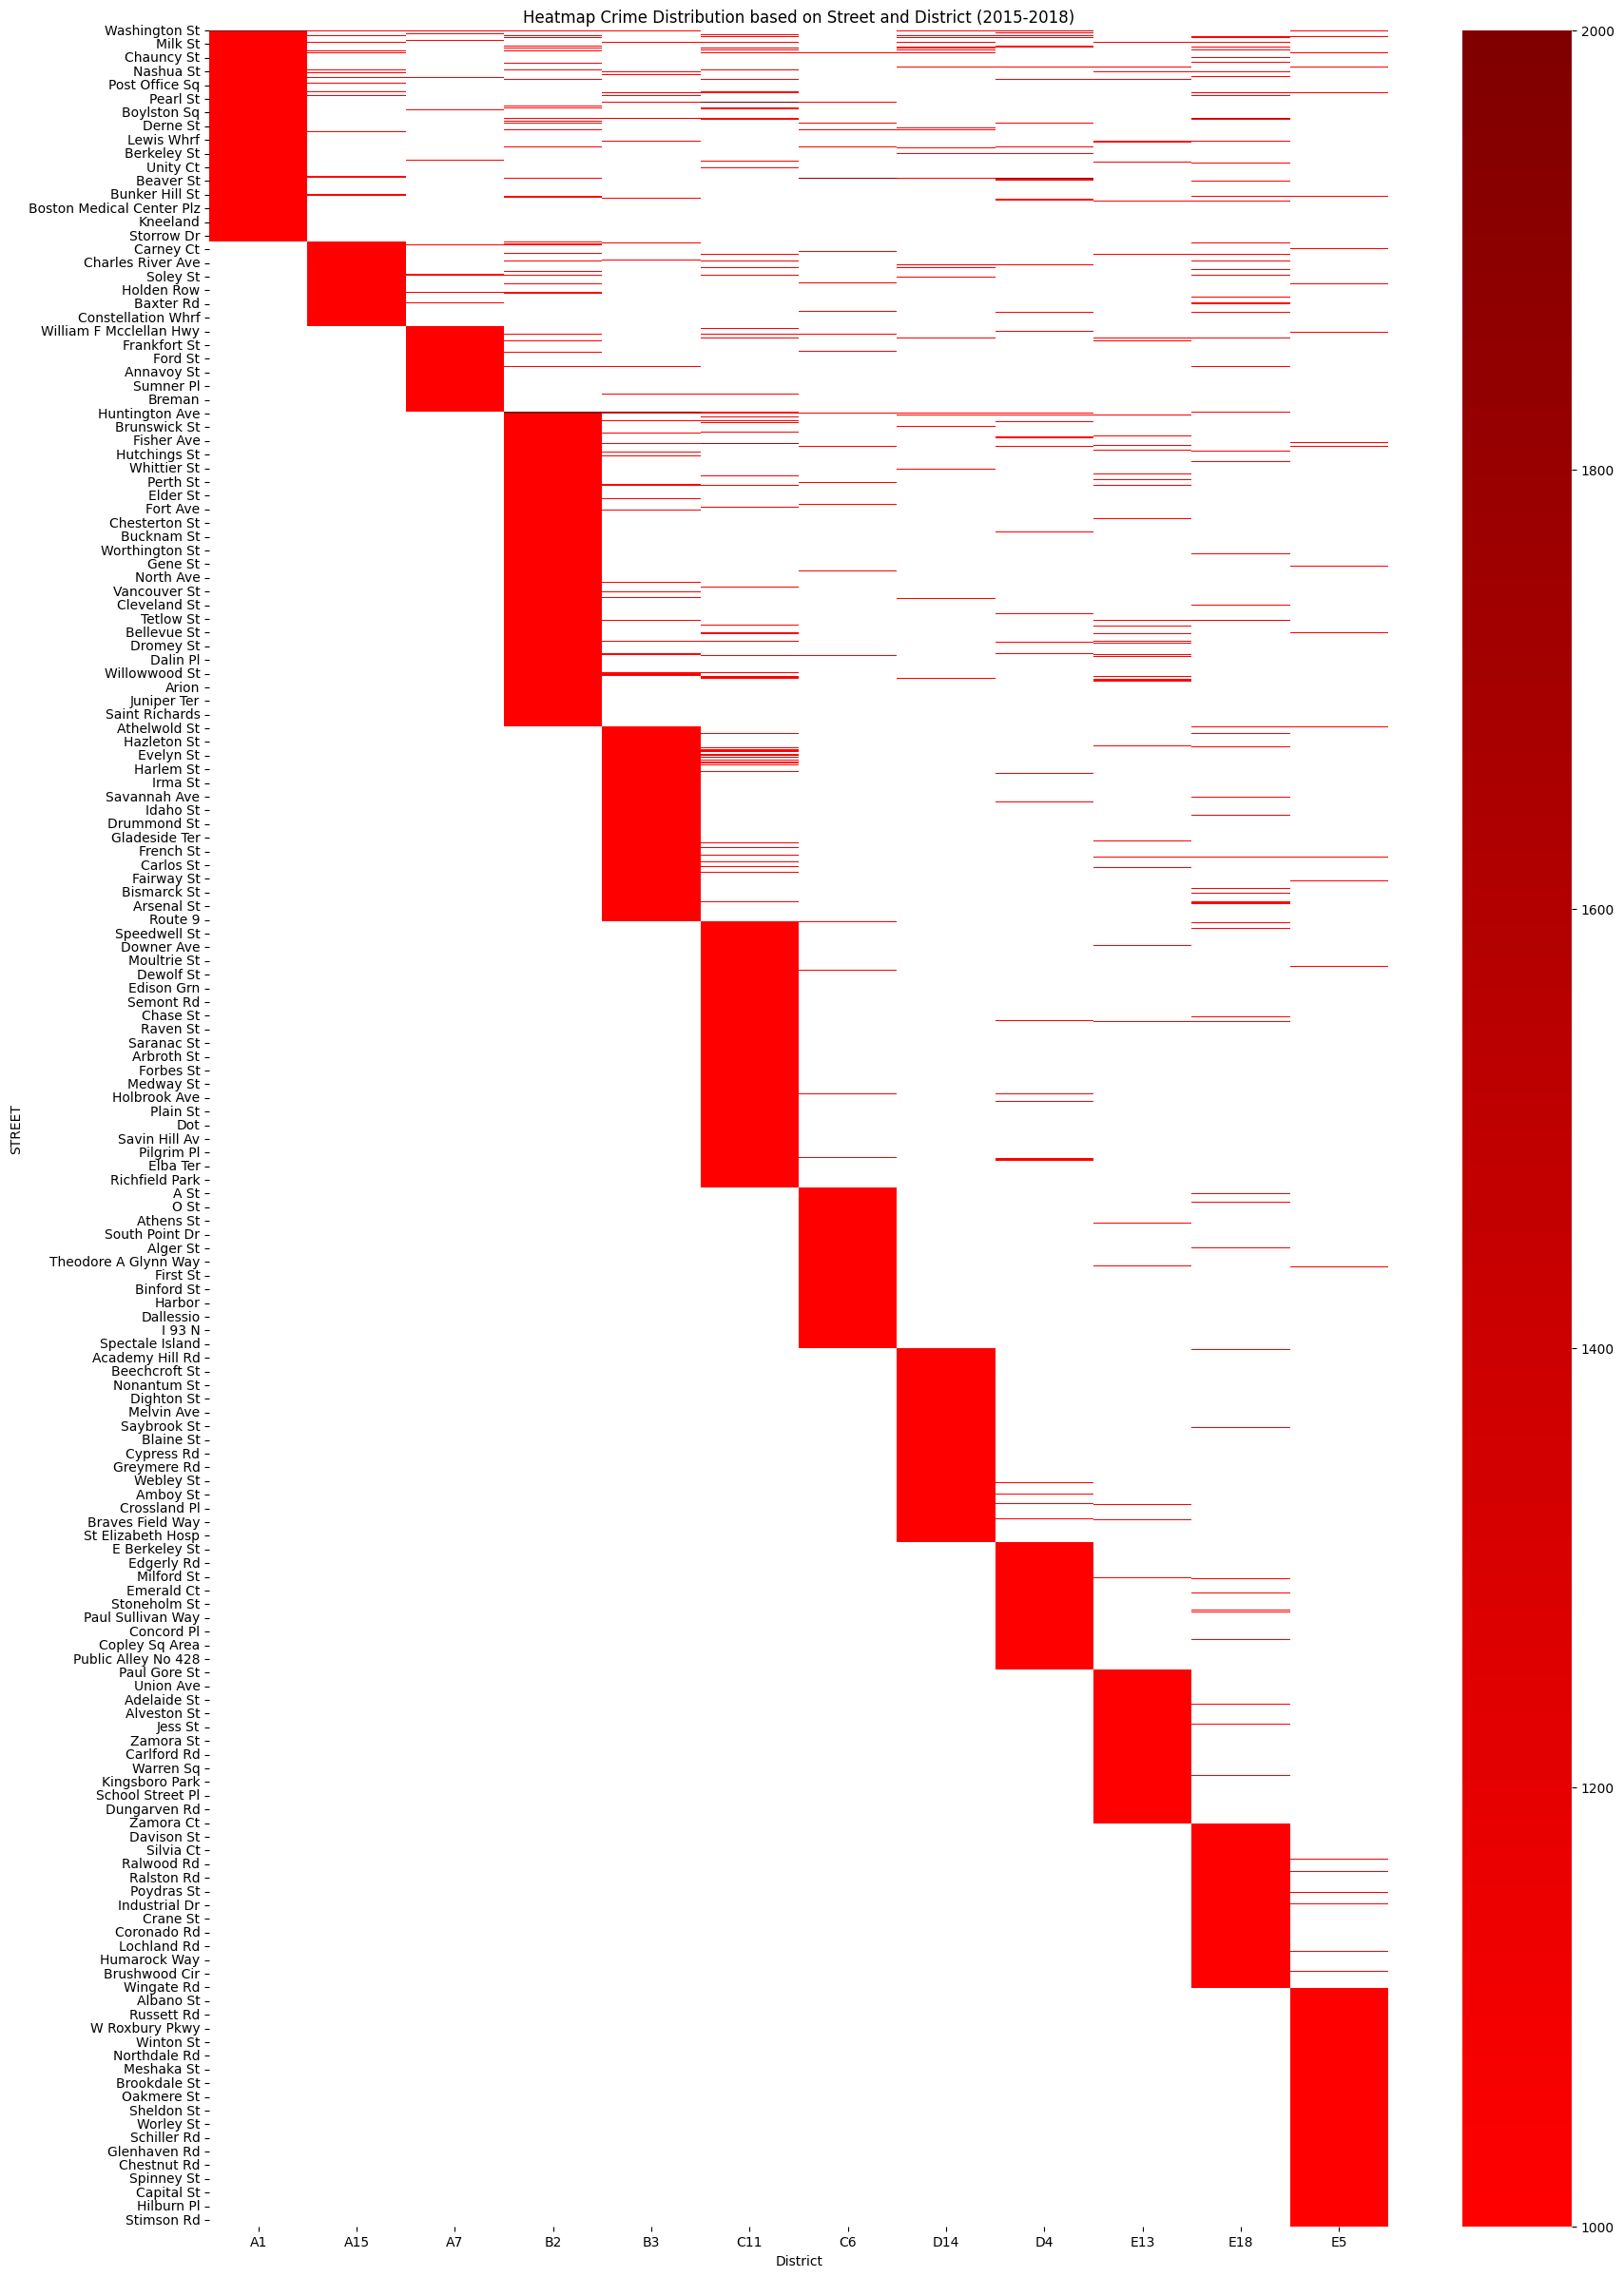

In [81]:
# Heatmap Street
af = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    ['STREET'],
    'DISTRICT',
    aggfunc='count'
)
af = af.sort_values(list(af.columns),ascending=False)
plt.figure(figsize=(20,30))
plt.title('Heatmap Crime Distribution based on Street and District (2015-2018)')
afh = sns.heatmap(af, square=False,cmap='seismic',vmax=2000,vmin=1000,center=0)
plt.xlabel('District')
# display(af)
afh;
# .sort_values('INCIDENT_NUMBER',ascending=False).reset_index()
# sns.barplot(data=af,x='DISTRICT',y='INCIDENT_NUMBER',hue='STREET')

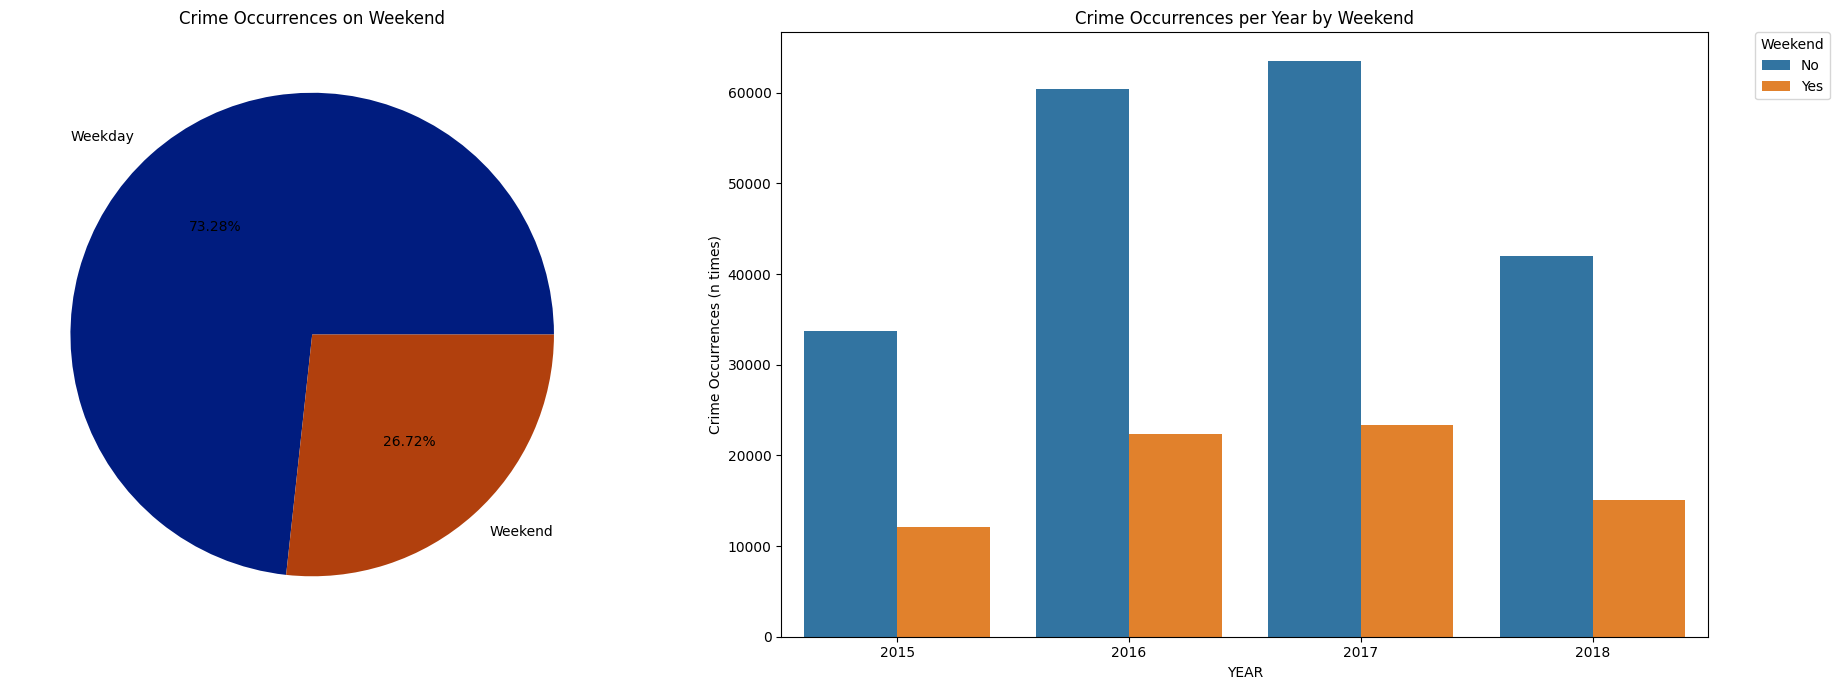

In [82]:
# Crime by Weekend

ag = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    'Weekend',
    aggfunc='count'
)


plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.pie(ag['INCIDENT_NUMBER'], labels=['Weekday','Weekend'], colors=sns.color_palette('dark'),autopct='%.2f%%');
plt.title('Crime Occurrences on Weekend')

plt.subplot(1,2,2)
sns.barplot(data=new_dfA.groupby(['YEAR','Weekend'])[['INCIDENT_NUMBER']].nunique().reset_index().sort_values('INCIDENT_NUMBER',ascending=False),x='YEAR',hue='Weekend',y='INCIDENT_NUMBER',estimator='median')
plt.title('Crime Occurrences per Year by Weekend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='Weekend')
plt.ylabel('Crime Occurrences (n times)')
plt.xlabel('YEAR')
plt.tight_layout()



Insight :

Berdasarkan pie chart 'Crime Occurrences on Weekend' dan barplot 'Crime Occurrences per Year by Weekends' disimpulkan bahwa tindakan kriminalitas banyak terjadi pada weekday (73.28%) baik secara keseluruhan (tahun 2015 - 2018) maupun pembagian data per tahunnya. Hal ini juga mungkin disebabkan oleh karena weekday terdiri dari 5 hari (Senin - Jumat) sedangkan weekend terdiri dari 2 hari (Sabtu dan Minggu)

In [83]:
police

,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5,Total
YEAR,,,,,,,,,,,,,
2015,219,38,88,307,201,263,143,119,260,101,99,79,1910
2016,368,69,146,537,387,475,245,219,442,193,182,142,3400
2017,402,78,152,557,400,472,252,233,472,197,201,155,3565
2018,268,48,98,354,270,297,183,147,314,132,136,99,2341
Mean,377,70,145,526,377,452,247,215,447,187,185,142,3365


In [84]:
lieutenant = police.copy()
lieutenant = np.ceil(lieutenant/25).astype(int)
lieutenant

,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5,Total
YEAR,,,,,,,,,,,,,
2015,9,2,4,13,9,11,6,5,11,5,4,4,77
2016,15,3,6,22,16,19,10,9,18,8,8,6,136
2017,17,4,7,23,16,19,11,10,19,8,9,7,143
2018,11,2,4,15,11,12,8,6,13,6,6,4,94
Mean,16,3,6,22,16,19,10,9,18,8,8,6,135


In [85]:
station

,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5,Total
YEAR,,,,,,,,,,,,,
2015,3,1,1,4,3,3,2,2,3,2,1,1,20
2016,4,1,2,6,4,5,3,3,5,2,2,2,34
2017,5,1,2,6,4,5,3,3,5,2,3,2,36
2018,3,1,1,4,3,3,2,2,4,2,2,1,24
Mean,4,1,2,6,4,5,3,3,5,2,2,2,34


In [86]:
# Pembagian street tempat police station harus disiagakan pada setiap district 
lihat()
au = new_dfA.pivot_table(
    'INCIDENT_NUMBER',
    ['DISTRICT','STREET'],
    aggfunc='count'
).reset_index()
au
aa = {}
for i in list(station.columns[:-1]) :
    aa.update({i:list(au[au['DISTRICT']==i][['STREET','INCIDENT_NUMBER']].sort_values('INCIDENT_NUMBER',ascending=False)['STREET'][:station.loc['Mean'][i]])})

print(f'''
Lokasi pembangungan police station : 
District A1 = Police station dibangun{aa['A1']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][0]} dan diawasi oleh {lieutenant.loc['Mean'][0]} lieutenant
District A15 = Police station dibangun{aa['A15']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][1]} dan diawasi oleh {lieutenant.loc['Mean'][1]} lieutenant
District A7 = Police station dibangun{aa['A7']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][2]} dan diawasi oleh {lieutenant.loc['Mean'][2]} lieutenant
District B2 = Police station dibangun{aa['B2']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][3]} dan diawasi oleh {lieutenant.loc['Mean'][3]} lieutenant
District B3 = Police station dibangun{aa['B3']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][4]} dan diawasi oleh {lieutenant.loc['Mean'][4]} lieutenant
District C11 = Police station dibangun{aa['C11']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][5]} dan diawasi oleh {lieutenant.loc['Mean'][5]} lieutenant
District C6 = Police station dibangun{aa['C6']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][6]} dan diawasi oleh {lieutenant.loc['Mean'][6]} lieutenant
District D14 = Police station dibangun{aa['D14']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][7]} dan diawasi oleh {lieutenant.loc['Mean'][7]} lieutenant
District D4 = Police station dibangun{aa['D4']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][8]} dan diawasi oleh {lieutenant.loc['Mean'][8]} lieutenant
District E13 = Police station dibangun{aa['E13']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][9]} dan diawasi oleh {lieutenant.loc['Mean'][9]} lieutenant
District E18 = Police station dibangun{aa['E18']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][10]} dan diawasi oleh {lieutenant.loc['Mean'][10]} lieutenant
District E5 = Police station dibangun{aa['E5']} dengan jumlah police officer yang harus ditempatkan sebanyak {police.loc['Mean'][11]} dan diawasi oleh {lieutenant.loc['Mean'][11]} lieutenant
''')


Lokasi pembangungan police station : 
District A1 = Police station dibangun['Washington St', 'Tremont St', 'Boylston St', 'Atlantic Ave'] dengan jumlah police officer yang harus ditempatkan sebanyak 377 dan diawasi oleh 16 lieutenant
District A15 = Police station dibangun['Bunker Hill St'] dengan jumlah police officer yang harus ditempatkan sebanyak 70 dan diawasi oleh 3 lieutenant
District A7 = Police station dibangun['Border St', 'Bennington St'] dengan jumlah police officer yang harus ditempatkan sebanyak 145 dan diawasi oleh 6 lieutenant
District B2 = Police station dibangun['Blue Hill Ave', 'Washington St', 'Dudley St', 'Columbia Rd', 'Warren St', 'Tremont St'] dengan jumlah police officer yang harus ditempatkan sebanyak 526 dan diawasi oleh 22 lieutenant
District B3 = Police station dibangun['Blue Hill Ave', 'River St', 'Norfolk St', 'Morton St'] dengan jumlah police officer yang harus ditempatkan sebanyak 377 dan diawasi oleh 16 lieutenant
District C11 = Police station dibangun

## Kesimpulan dan Saran

### Kesimpulan

1. Penentuan street untuk police station di Boston 2019 adalah sebagai berikut :

&emsp; &ensp; Lokasi pembangungan police station : 
<br>
&emsp; &ensp; District A1 = Police station dibangun['Washington St', 'Tremont St', 'Boylston St', 'Atlantic Ave'] dengan jumlah police officer yang harus ditempatkan sebanyak 377 dan diawasi oleh 16 lieutenant
<br>
&emsp; &ensp; District A15 = Police station dibangun['Bunker Hill St'] dengan jumlah police officer yang harus ditempatkan sebanyak 70 dan diawasi oleh 3 lieutenant
<br>
&emsp; &ensp; District A7 = Police station dibangun['Border St', 'Bennington St'] dengan jumlah police officer yang harus ditempatkan sebanyak 145 dan diawasi oleh 6 lieutenant
<br>
&emsp; &ensp; District B2 = Police station dibangun['Blue Hill Ave', 'Washington St', 'Dudley St', 'Columbia Rd', 'Warren St', 'Tremont St'] dengan jumlah police officer yang harus ditempatkan sebanyak 526 dan diawasi oleh 22 lieutenant
<br>
&emsp; &ensp; District B3 = Police station dibangun['Blue Hill Ave', 'River St', 'Norfolk St', 'Morton St'] dengan jumlah police officer yang harus ditempatkan sebanyak 377 dan diawasi oleh 16 lieutenant
<br>
&emsp; &ensp; District C11 = Police station dibangun['Dorchester Ave', 'Washington St', 'Adams St', 'Geneva Ave', 'Bowdoin St'] dengan jumlah police officer yang harus ditempatkan sebanyak 452 dan diawasi oleh 19 lieutenant
<br>
&emsp; &ensp; District C6 = Police station dibangun['Massachusetts Ave', 'W Broadway', 'Allstate Rd'] dengan jumlah police officer yang harus ditempatkan sebanyak 247 dan diawasi oleh 10 lieutenant
<br>
&emsp; &ensp; District D14 = Police station dibangun['Commonwealth Ave', 'Washington St', 'Cambridge St'] dengan jumlah police officer yang harus ditempatkan sebanyak 215 dan diawasi oleh 9 lieutenant
<br>
&emsp; &ensp; District D4 = Police station dibangun['Boylston St', 'Harrison Ave', 'Massachusetts Ave', 'Huntington Ave', 'Newbury St'] dengan jumlah police officer yang harus ditempatkan sebanyak 447 dan diawasi oleh 18 lieutenant
<br>
&emsp; &ensp; District E13 = Police station dibangun['Centre St', 'Washington St'] dengan jumlah police officer yang harus ditempatkan sebanyak 187 dan diawasi oleh 8 lieutenant
<br>
&emsp; &ensp; District E18 = Police station dibangun['Hyde Park Ave', 'River St'] dengan jumlah police officer yang harus ditempatkan sebanyak 185 dan diawasi oleh 8 lieutenant
<br>
&emsp; &ensp; District E5 = Police station dibangun['Washington St', 'Centre St'] dengan jumlah police officer yang harus ditempatkan sebanyak 142 dan diawasi oleh 6 lieutenant
<br>
Total dibutuhkan 3365 police officers dan 135 lieutenants untuk seluruh District Boston

2. Secara umum kriminalitas di Boston mengalami peningkatan dari tahun 2015
3. Persentase tingkat kriminalitas terbanyak dipegang oleh kejahatan UCR part 3 pada tahun 2015-2018
4. District dengan tingkat kriminalitas terbanyak terletak di B2,C11,D4 pada tahun 2015-2018
5. Jam dan kategori waktu memiliki pola atau keterkaitan dengan tingkat persentase kriminalitas yang terjadi di Boston pada tahun 2015-2018
6. Terdapat korelasi positif antara jumlah street dengan  persentase tingkat kriminalitas yang terjadi.
7. Pada weekday (Monday - Friday), persentase jumlah kriminalitas tinggi pada Morning dan Afternoon 
8. Pada weekend (Saturday - Sunday), persentase jumlah kriminalitas tinggi pada Evening
9. Persentase jumlah kriminalitas tinggi pada bulan Juni, July dan Agustus terutama pada tanggal 1 setiap bulannya.


### Saran 
Boston Police Department sebaiknya `mensiagakan polisi pada Street yang telah disarankan pada setiap Districtnya`. Direkomendasikan agar Boston Police Department juga meningkatkan pengamanan pada `waktu pagi dan siang hari ketika weekday`, sedangkan pada `weekend lebih baik mengalokasikan police officer ketika waktu malam`. Boston Police Department juga harus `meningkatkan keamanan terutama awal bulan Juni, July dan Agustus`.

## Conclusion 

1. Recommended location to place police stations as follow : 

    District A1 = Police station should be placed at ['Washington St', 'Tremont St', 'Boylston St', 'Atlantic Ave'] with 377 police officers stand by and supervised by 16 lieutenants

    District A15 = Police station should be placed at ['Bunker Hill St'] with 70 police officers stand by and supervised by 3 lieutenants

    District A7 = Police station should be placed at ['Border St', 'Bennington St'] with 145 police officers stand by and supervised by 6 lieutenants

    District B2 = Police station should be placed at ['Blue Hill Ave', 'Washington St', 'Dudley St', 'Columbia Rd', 'Warren St', 'Tremont St'] with 526 police officers stand by and supervised by 22 lieutenants

    District B3 = Police station should be placed at ['Blue Hill Ave', 'River St', 'Norfolk St', 'Morton St'] with 377 police officers stand by and supervised by 16 lieutenants

    District C11 = Police station should be placed at ['Dorchester Ave', 'Washington St', 'Adams St', 'Geneva Ave', 'Bowdoin St'] with 452 police officers stand by and supervised by 19 lieutenants

    District C6 = Police station should be placed at ['Massachusetts Ave', 'W Broadway', 'Allstate Rd'] with 247 police officers stand by and supervised by 10 lieutenants

    District D14 = Police station should be placed at ['Commonwealth Ave', 'Washington St', 'Cambridge St'] with 215 police officers stand by and supervised by 9 lieutenants

    District D4 = Police station should be placed at ['Boylston St', 'Harrison Ave', 'Massachusetts Ave', 'Huntington Ave', 'Newbury St'] with 447 police officers stand by and supervised by 18 lieutenants

    District E13 = Police station should be placed at ['Centre St', 'Washington St'] with 187 police officers stand by and supervised by 8 lieutenants

    District E18 = Police station should be placed at ['Hyde Park Ave', 'River St'] with 185 police officers stand by and supervised by 8 lieutenants

    District E5 = Police station should be placed at ['Washington St', 'Centre St'] with 142 police officers stand by and supervised by 6 lieutenants 

Total  3365 police officers and 135 lieutenants needed for all Districts in Boston

2. Crime in Boston is increasing from 2015 in general.
3. 'UCR Part 3' is the most rated crimes that is occurred between 2015 - 2018.
4. District with the most crimes are B2,C11,D4 between 2015 - 2018.
5. Times and times category is the most significant features towards crime occurrence in Boston between 2015 - 2018.
6. There is positive correlation between quantity of street with crime occurrence that is happened in Boston.
7. During weekday (Monday - Friday), crime occurrence is higher in the 'Morning' and 'Afternoon'. 
8. During weekend (Saturday - Sunday), crime occurrence is higher in the 'Evening'
9. Most of crimes is occurred on June, July and August especially in the beginning of the month (first date of the month).


### Recommendation
Boston Police Department is recommended to `allocate the police officers based on recommendation police officers placement` above. It is recommended for Boston Police Department to `increase awareness and attention towards crimes activity in the 'morning and afternoon' during weekdays`, yet  `increase awareness and attention towards crimes activity in the 'evening' during weekends`. Boston Police Department need to increase alertness for the upcoming crimes which tends to occurred on beginning of the months (first date of the months)